<a href="https://colab.research.google.com/github/Tiwari666/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('/content/loan_train.csv')
df1.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0  ...        809.44             0.0                    NaN        746.0   
1  ...        780.40             0.0            Unpossessed        608.0   
2  ...        833.15             0.0            Unpossessed        546.0   
3  ...        832.70             1.0            Unpossessed        890.0   
4  ...        745.55             1.0                 Active        715.0   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05            4.0             Rural           1.0   
1       4952.91            2.0             Rural           1.0   
2        988.19            2.0             Urban           0.0   
3           NaN            2.0        Semi-Urban           1.0   
4       2614.77            4.0        Semi-Urban           1.0   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28  

[5 rows x 24 columns]

In [4]:
df1.shape

(21055, 24)

In [5]:
df2 = pd.read_csv('/content/loan_test.csv')
df2.head()

Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-26247  Tandra Olszewski      F   47       3472.69              Low   
1     C-35067     Jeannette Cha      F   57       1184.84              Low   
2     C-34590      Keva Godfrey      F   52       1266.27              Low   
3     C-16668      Elva Sackett      M   65       1369.72             High   
4     C-12196    Sade Constable      F   60       1939.23             High   

             Profession Type of Employment    Location  \
0  Commercial associate           Managers  Semi-Urban   
1               Working        Sales staff       Rural   
2               Working                NaN  Semi-Urban   
3             Pensioner                NaN       Rural   
4             Pensioner                NaN       Urban   

   Loan Amount Request (USD)  ...  Dependents Credit Score No. of Defaults  \
0                  137088.98  ...         2.0       799.14               0   
1                  104771.59  ...         2.0       833.31               0   
2                  176684.91  ...         3.0       627.44               0   
3                   97009.18  ...         2.0       833.20               0   
4                  109980.00  ...         NaN          NaN               0   

   Has Active Credit Card  Property ID  Property Age Property Type  \
0             Unpossessed          843       3472.69             2   
1             Unpossessed           22       1184.84             1   
2             Unpossessed            1       1266.27             1   
3                Inactive          730       1369.72             1   
4                     NaN          356       1939.23             4   

   Property Location  Co-Applicant  Property Price  
0              Urban             1        236644.5  
1              Rural             1        142357.3  
2              Urban             1       300991.24  
3         Semi-Urban             0        125612.1  
4         Semi-Urban             1        180908.0  

[5 rows x 23 columns]

In [6]:
df2.shape

(20000, 23)

In [7]:
from tabulate import tabulate

# Concatenate the column names of df1 and df2
combined_columns = pd.concat([df1.columns.to_frame(name='df1_cols'), df2.columns.to_frame(name='df2_cols')], axis=1)

# Convert the concatenated DataFrame to a list of lists
combined_columns_list = combined_columns.values.tolist()

# Display the table
print(tabulate(combined_columns_list, headers=['df1 Columns', 'df2 Columns'], tablefmt='grid'))

+-----------------------------+-----------------------------+
| df1 Columns                 | df2 Columns                 |
+=============================+=============================+
| Customer ID                 | Customer ID                 |
+-----------------------------+-----------------------------+
| Name                        | Name                        |
+-----------------------------+-----------------------------+
| Gender                      | Gender                      |
+-----------------------------+-----------------------------+
| Age                         | Age                         |
+-----------------------------+-----------------------------+
| Income (USD)                | Income (USD)                |
+-----------------------------+-----------------------------+
| Income Stability            | Income Stability            |
+-----------------------------+-----------------------------+
| Profession                  | Profession                  |
+-------

As the test dataset does not have the target variable (Loan Sanction Amount), we will use only the train dataset as a complete dataset. Assuming the train dataset as the original datset, we will split it into the trin and test dataset during the entire analysis process.

# **Exploratory Data Analysis (EDA):**

In [8]:
df = df1.copy()
df.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0  ...        809.44             0.0                    NaN        746.0   
1  ...        780.40             0.0            Unpossessed        608.0   
2  ...        833.15             0.0            Unpossessed        546.0   
3  ...        832.70             1.0            Unpossessed        890.0   
4  ...        745.55             1.0                 Active        715.0   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05            4.0             Rural           1.0   
1       4952.91            2.0             Rural           1.0   
2        988.19            2.0             Urban           0.0   
3           NaN            2.0        Semi-Urban           1.0   
4       2614.77            4.0        Semi-Urban           1.0   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28  

[5 rows x 24 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21055 entries, 0 to 21054
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  21055 non-null  object 
 1   Name                         21055 non-null  object 
 2   Gender                       21021 non-null  object 
 3   Age                          21055 non-null  int64  
 4   Income (USD)                 17835 non-null  float64
 5   Income Stability             19894 non-null  object 
 6   Profession                   21055 non-null  object 
 7   Type of Employment           15972 non-null  object 
 8   Location                     21055 non-null  object 
 9   Loan Amount Request (USD)    21054 non-null  float64
 10  Current Loan Expenses (USD)  20939 non-null  float64
 11  Expense Type 1               21054 non-null  object 
 12  Expense Type 2               21054 non-null  object 
 13  Dependents      

In [159]:
df.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [10]:
df.describe().T

count           mean           std      min  \
Age                          21055.0      39.962574     16.066359    18.00   
Income (USD)                 17835.0    2655.053317  13403.166088   378.91   
Loan Amount Request (USD)    21054.0   88477.615634  59068.455830  6048.24   
Current Loan Expenses (USD)  20939.0     399.902412    241.275601  -999.00   
Dependents                   19316.0       2.254970      0.944959     1.00   
Credit Score                 19878.0     739.637229     72.184135   580.00   
No. of Defaults              21054.0       0.195877      0.396884     0.00   
Property ID                  21054.0     501.755153    288.566052     1.00   
Property Age                 17627.0    2656.723882  13481.075150   378.91   
Property Type                21054.0       2.458108      1.121095     1.00   
Co-Applicant                 21054.0      -4.937209     75.893274  -999.00   
Property Price               21054.0  131217.578526  92851.167608  -999.00   
Loan Sanction Amount (USD)   20816.0   47120.657379  47708.819516  -999.00   

                                    25%         50%          75%         max  
Age                             25.0000      40.000      55.0000       65.00  
Income (USD)                  1647.4400    2223.810    3092.9450  1777460.21  
Loan Amount Request (USD)    41135.7675   75146.895  119546.0550   621497.82  
Current Loan Expenses (USD)    247.6250     374.020     519.2000     3840.88  
Dependents                       2.0000       2.000       3.0000       10.00  
Credit Score                   681.1675     739.030     799.1125      896.26  
No. of Defaults                  0.0000       0.000       0.0000        1.00  
Property ID                    250.0000     501.000     752.0000      999.00  
Property Age                  1647.2800    2225.410    3094.3400  1777460.21  
Property Type                    1.0000       2.000       3.0000        4.00  
Co-Applicant                     1.0000       1.000       1.0000        1.00  
Property Price               60610.7325  109732.550  178155.3375  1077966.73  
Loan Sanction Amount (USD)       0.0000   34678.555   73826.9800   481907.32

In [161]:
df.describe(include = "object").T

count unique               top   freq
Customer ID             30000  30000           C-36995      1
Name                    30000  30000  Frederica Shealy      1
Gender                  29947      2                 M  15053
Income Stability        28317      2               Low  25751
Profession              30000      8           Working  16926
Type of Employment      22730     18          Laborers   5578
Location                30000      3        Semi-Urban  21563
Expense Type 1          30000      2                 N  19214
Expense Type 2          30000      2                 Y  20180
Has Active Credit Card  28434      3            Active   9771
Property Location       29644      3        Semi-Urban  10387

# **Functions defined for EDA:**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def value_count_and_frequency(df, feature):
    """
    Calculate the value count and frequency of each observation within a feature.
    """
    value_count = df[feature].value_counts()
    frequency = df[feature].value_counts(normalize=True) * 100
    return pd.concat([value_count, frequency], axis=1, keys=['Count', 'Frequency (%)'])


def describe_feature(df, feature):
    '''
    Function to display general information about the feature
    '''
    match feature:
        case 'Age' | 'Income (USD)' | 'Loan Amount Request (USD)' | 'Current Loan Expenses (USD)' | 'Credit Score' | 'Property Price' | 'Loan Sanction Amount (USD)':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case 'Property Age':
            print('Description:\n{}'.format(df[feature].describe() / 365.25))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case _:
            print('Description:\n{}'.format(df[feature].describe(exclude='number')))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            value_cnt = value_count_and_frequency(df, feature)
            print('Value count:\n{}'.format(value_cnt))


def create_bar_plot(df, feature):
    """
    Create a bar chart plot with percentages on top of each bar.
    """
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts(), color='blue')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{feature} count')

    # Add percentages on top of each bar
    total = float(len(df[feature]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

def create_donut_pie_chart(df, feature):
    """
    Create a donut pie chart.
    """
    ratio_size = value_count_and_frequency(df, feature)
    ratio_list = ratio_size['Frequency (%)']
    plt.figure(figsize=(5, 4))
    plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'blue'})
    plt.title(f'Donut Pie chart of {feature}')
    plt.legend(loc='best')
    plt.axis('equal')
    plt.gca().add_artist(plt.Circle((0, 0), 0.8, color='white'))
    plt.show()

def create_box_plot(df, feature):
    """
    Create a box plot.
    """
    plt.figure(figsize=(2, 8))
    sns.boxplot(y=df[feature] if feature != 'Property Age' else df[feature] / 365.25)
    plt.title(f'{feature} distribution (Boxplot)')
    plt.show()

def create_hist_plot(df, feature, the_bins=50):
    """
    Create a histogram plot.
    """
    plt.figure(figsize=(18, 10))
    sns.histplot(df[feature] if feature != 'Property Age' else df[feature] / 365.25, bins=the_bins, kde=True)
    plt.title(f'{feature} distribution')
    plt.show()

def missing_value_percentage(df, feature):
    """
    Calculate the percentage of missing values in the specified feature.
    """
    missing_count = df[feature].isnull().sum()
    total_rows = df.shape[0]
    return f'The percentage of missing rows is {missing_count * 100 / total_rows:.2f}%'

# **Univariate Analysis for Categorical variables:**

In [10]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [11]:
cat_df = df.select_dtypes(include = "object")
cat_df.head(2)

Customer ID               Name Gender Income Stability Profession  \
0     C-36995   Frederica Shealy      F              Low    Working   
1     C-33999  America Calderone      M              Low    Working   

  Type of Employment    Location Expense Type 1 Expense Type 2  \
0        Sales staff  Semi-Urban              N              N   
1                NaN  Semi-Urban              N              Y   

  Has Active Credit Card Property Location  
0                    NaN             Rural  
1            Unpossessed             Rural

In [12]:
cat_df.columns

Index(['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')

# **Gender:**

In [ ]:
describe_feature(cat_df, 'Gender')

Description:
count     29947
unique        2
top           M
freq      15053
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
M  15053      50.265469
F  14894      49.734531


In [ ]:
missing_value_percentage(cat_df, 'Gender')

'The percentage of missing rows is 0.18%'

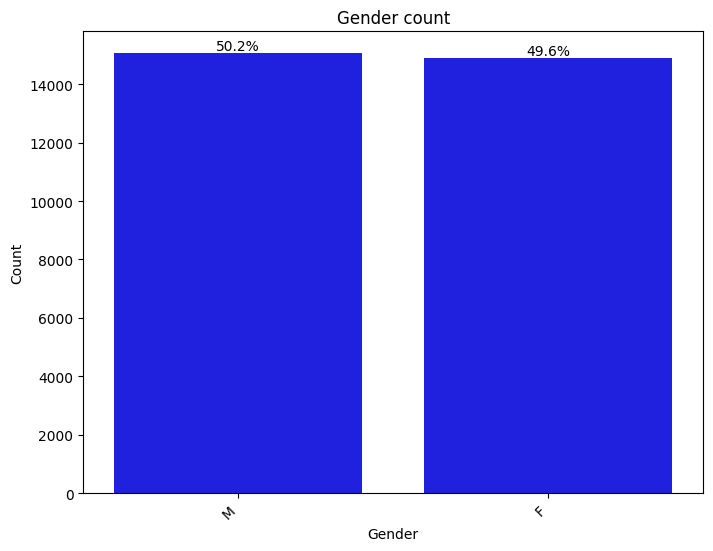

In [ ]:
create_bar_plot(cat_df, 'Gender')

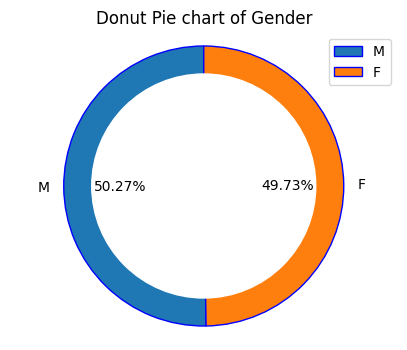

In [ ]:
create_donut_pie_chart(cat_df, 'Gender')

Interpretation:

We have almost the same number of Male and Female (50.27% vs 49.73%)

# **Income stability:**

In [ ]:
cat_df["Income Stability"].value_counts()

Low     25751
High     2566
Name: Income Stability, dtype: int64

In [ ]:
describe_feature(cat_df, "Income Stability")

Description:
count     28317
unique        2
top         Low
freq      25751
Name: Income Stability, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
      Count  Frequency (%)
Low   25751      90.938306
High   2566       9.061694


In [ ]:
missing_value_percentage(cat_df, "Income Stability")

'The percentage of missing rows is 5.61%'

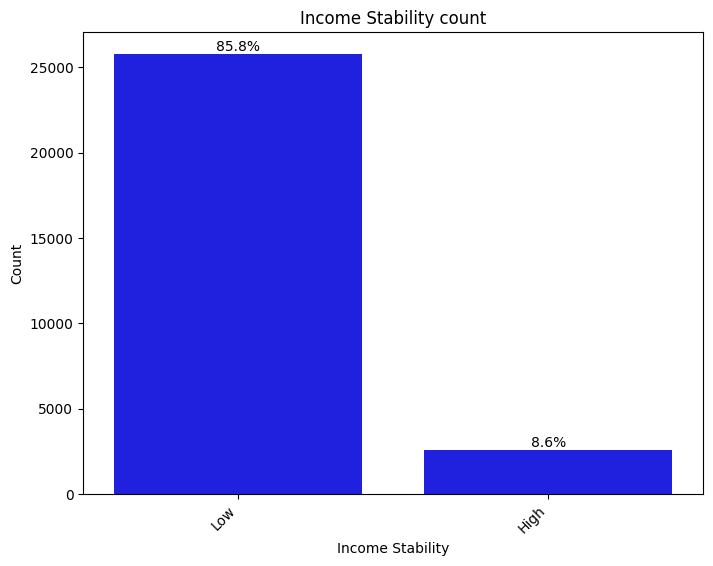

In [ ]:
create_bar_plot(cat_df, "Income Stability")

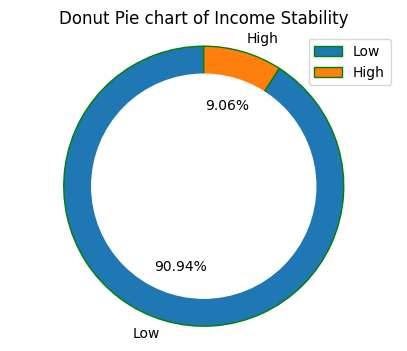

In [ ]:
create_donut_pie_chart(cat_df, "Income Stability")

# **Profession:**

In [ ]:
describe_feature(cat_df, "Profession")

Description:
count       30000
unique          8
top       Working
freq        16926
Name: Profession, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Working               16926      56.420000
Commercial associate   7962      26.540000
Pensioner              2740       9.133333
State servant          2366       7.886667
Unemployed                2       0.006667
Businessman               2       0.006667
Student                   1       0.003333
Maternity leave           1       0.003333


In [ ]:
missing_value_percentage(cat_df, "Profession")

'The percentage of missing rows is 0.00%'

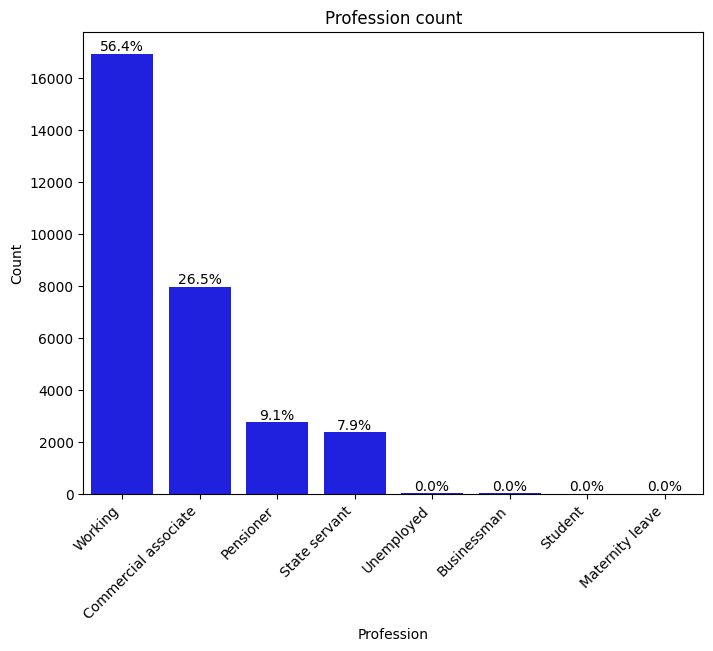

In [13]:
create_bar_plot(cat_df,"Profession")

In [151]:
# Plot a pie chart without labels
df['Profession'].value_counts().plot(kind='pie', labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend with labels
plt.legend(df['Profession'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

KeyError: 'Profession'

# **Type of Employment:**

In [ ]:
describe_feature(cat_df, 'Type of Employment')

Description:
count        22730
unique          18
top       Laborers
freq          5578
Name: Type of Employment, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Laborers                5578      24.540255
Sales staff             3736      16.436428
Core staff              3230      14.210295
Managers                2495      10.976683
Drivers                 1606       7.065552
Accountants             1379       6.066872
High skill tech staff   1307       5.750110
Medicine staff           864       3.801144
Security staff           579       2.547294
Cooking staff            566       2.490101
Private service staff    342       1.504619
Cleaning staff           341       1.500220
Low-skill Laborers       162       0.712714
Secretaries              161       0.708315
Waiters/barmen staff     149       0.655521
Realty agents             86    

In [ ]:
missing_value_percentage(cat_df, 'Type of Employment')

'The percentage of missing rows is 24.23%'

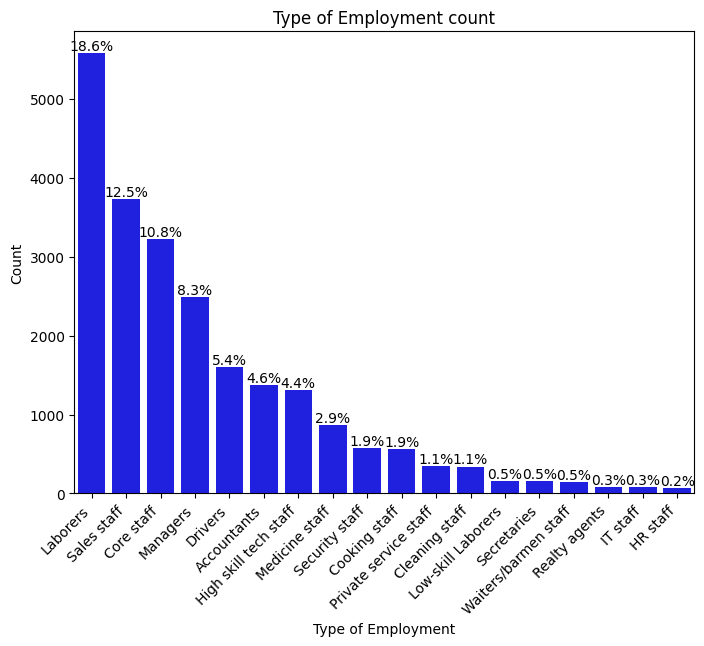

In [ ]:
create_bar_plot(cat_df, 'Type of Employment')

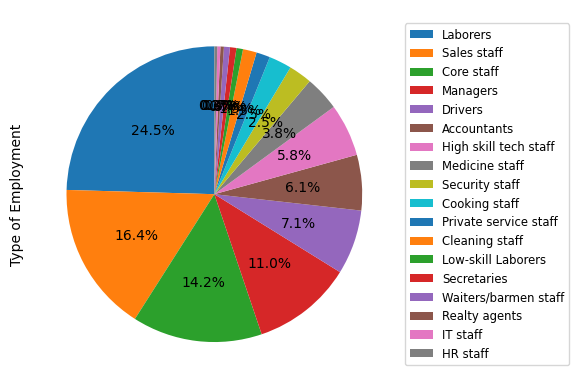

In [ ]:
# Plot a pie chart without labels
df['Type of Employment'].value_counts().plot(kind='pie', labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend with labels
plt.legend(df['Type of Employment'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

In [ ]:
describe_feature(cat_df, 'Location')

Description:
count          30000
unique             3
top       Semi-Urban
freq           21563
Name: Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  21563      71.876667
Rural        5338      17.793333
Urban        3099      10.330000


In [ ]:
missing_value_percentage(cat_df, 'Location')

'The percentage of missing rows is 0.00%'

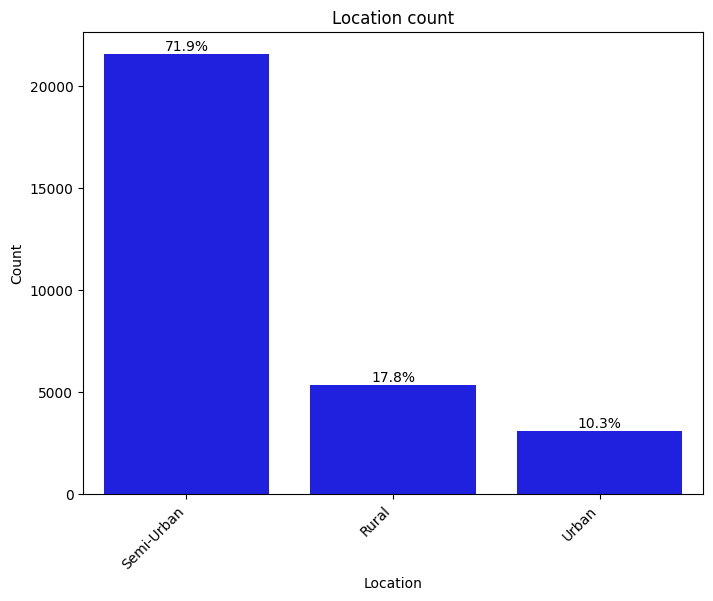

In [ ]:
create_bar_plot(cat_df, 'Location')

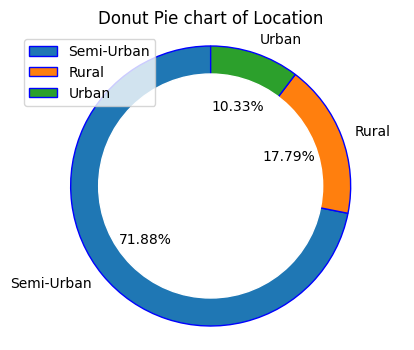

In [ ]:
create_donut_pie_chart(cat_df, 'Location')

# **Expense Type 1**

In [ ]:
describe_feature(cat_df, 'Expense Type 1')

Description:
count     30000
unique        2
top           N
freq      19214
Name: Expense Type 1, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
N  19214      64.046667
Y  10786      35.953333


In [ ]:
missing_value_percentage(cat_df, 'Expense Type 1')

'The percentage of missing rows is 0.00%'

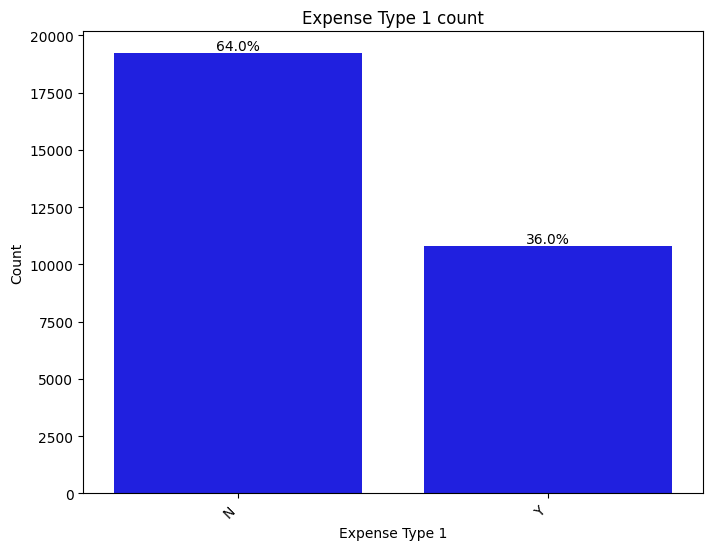

In [ ]:
create_bar_plot(cat_df, 'Expense Type 1')

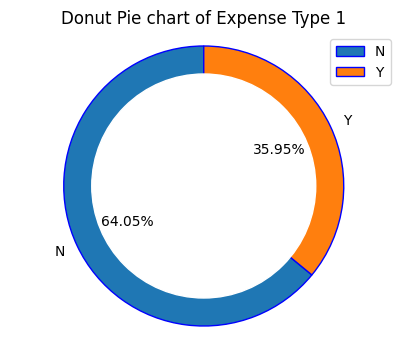

In [ ]:
create_donut_pie_chart(cat_df, 'Expense Type 1')

# **Expense Type 2:**

In [ ]:
describe_feature(cat_df, 'Expense Type 2')

Description:
count     30000
unique        2
top           Y
freq      20180
Name: Expense Type 2, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
Y  20180      67.266667
N   9820      32.733333


In [ ]:
missing_value_percentage(cat_df, 'Expense Type 2')

'The percentage of missing rows is 0.00%'

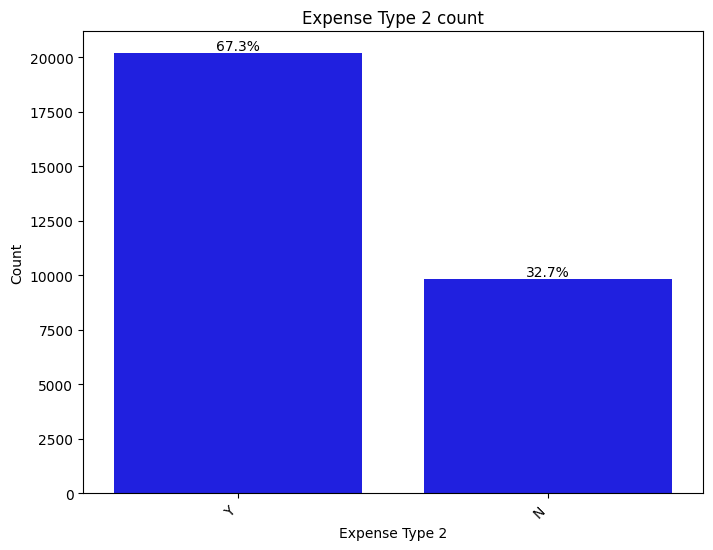

In [ ]:
create_bar_plot(cat_df, 'Expense Type 2')

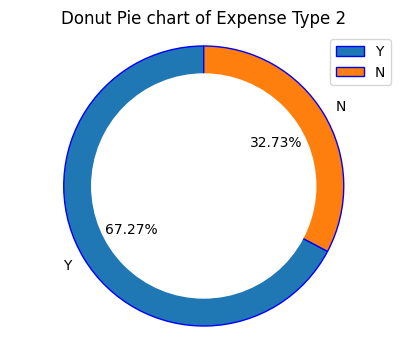

In [ ]:
create_donut_pie_chart(cat_df, 'Expense Type 2')

# **Has Active Credit Card:**

In [ ]:
describe_feature(cat_df, 'Has Active Credit Card')

Description:
count      28434
unique         3
top       Active
freq        9771
Name: Has Active Credit Card, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
             Count  Frequency (%)
Active        9771       34.36379
Inactive      9466       33.29113
Unpossessed   9197       32.34508


In [ ]:
missing_value_percentage(cat_df, 'Has Active Credit Card')

'The percentage of missing rows is 5.22%'

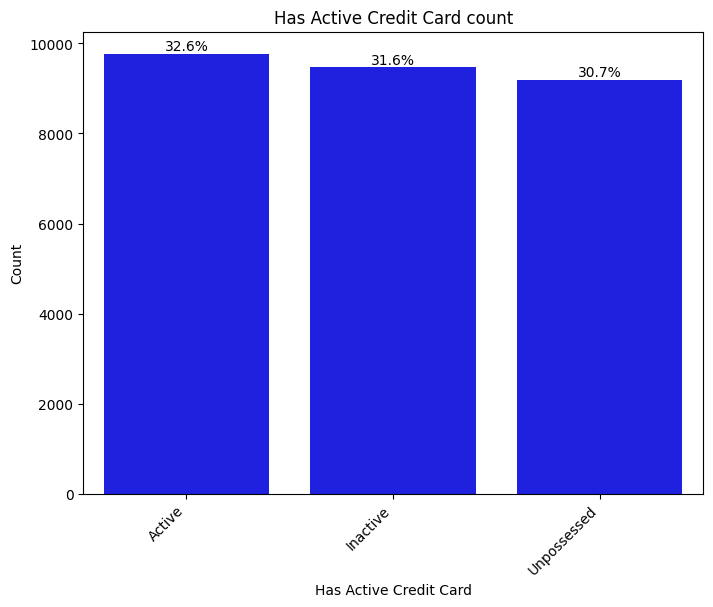

In [ ]:
create_bar_plot(cat_df, 'Has Active Credit Card')

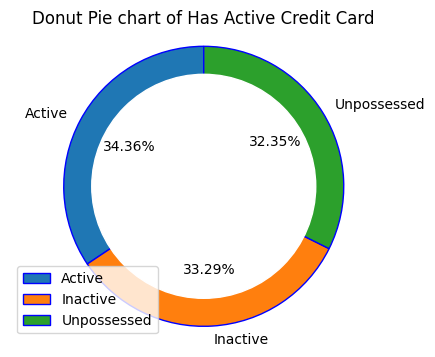

In [ ]:
create_donut_pie_chart(cat_df, 'Has Active Credit Card')

# **Property Location**

In [ ]:
describe_feature(cat_df, 'Property Location')

Description:
count          29644
unique             3
top       Semi-Urban
freq           10387
Name: Property Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  10387      35.039131
Rural       10041      33.871947
Urban        9216      31.088922


In [ ]:
missing_value_percentage(cat_df, 'Property Location')

'The percentage of missing rows is 1.19%'

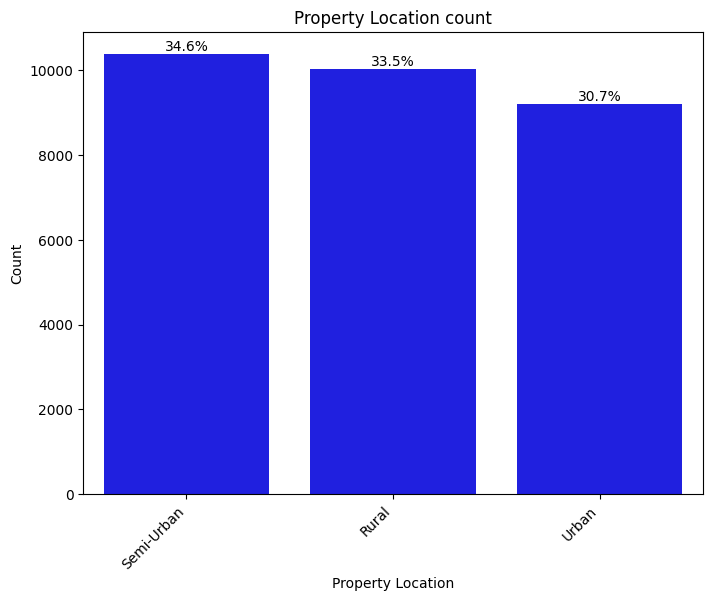

In [ ]:
create_bar_plot(cat_df, 'Property Location')

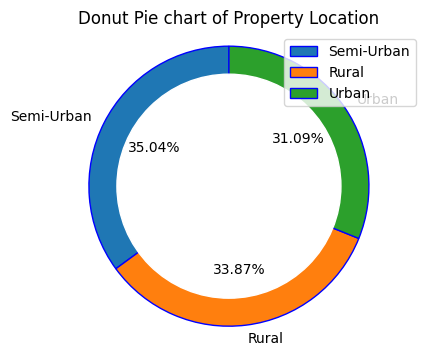

In [ ]:
create_donut_pie_chart(cat_df, 'Property Location')

# **Univariate Analysis on Numeric Columns:**

In [14]:
num_df = df.select_dtypes(exclude = "object").drop("Property ID", axis =1)
num_df.head(2)

Age  Income (USD)  Loan Amount Request (USD)  Current Loan Expenses (USD)  \
0   56       1933.05                   72809.58                       241.08   
1   32       4952.91                   46837.47                       495.81   

   Dependents  Credit Score  No. of Defaults  Property Age  Property Type  \
0         3.0        809.44                0       1933.05              4   
1         1.0        780.40                0       4952.91              2   

   Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0             1       119933.46                    54607.18  
1             1        54791.00                    37469.98

In [15]:
num_df.columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Age', 'Property Type', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

# **Age**

In [ ]:
describe_feature(num_df, 'Age')

Description:
count    30000.000000
mean        40.092300
std         16.045129
min         18.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         65.000000
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.046093801598670575


In [ ]:
missing_value_percentage(num_df, 'Age')

'The percentage of missing rows is 0.00%'

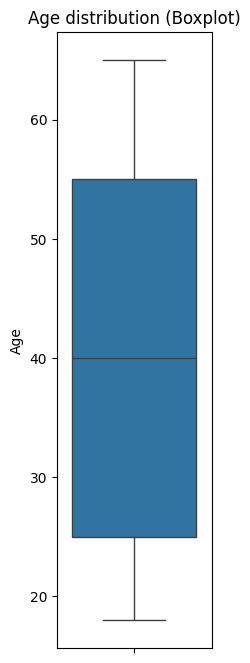

In [ ]:
create_box_plot(num_df, 'Age')

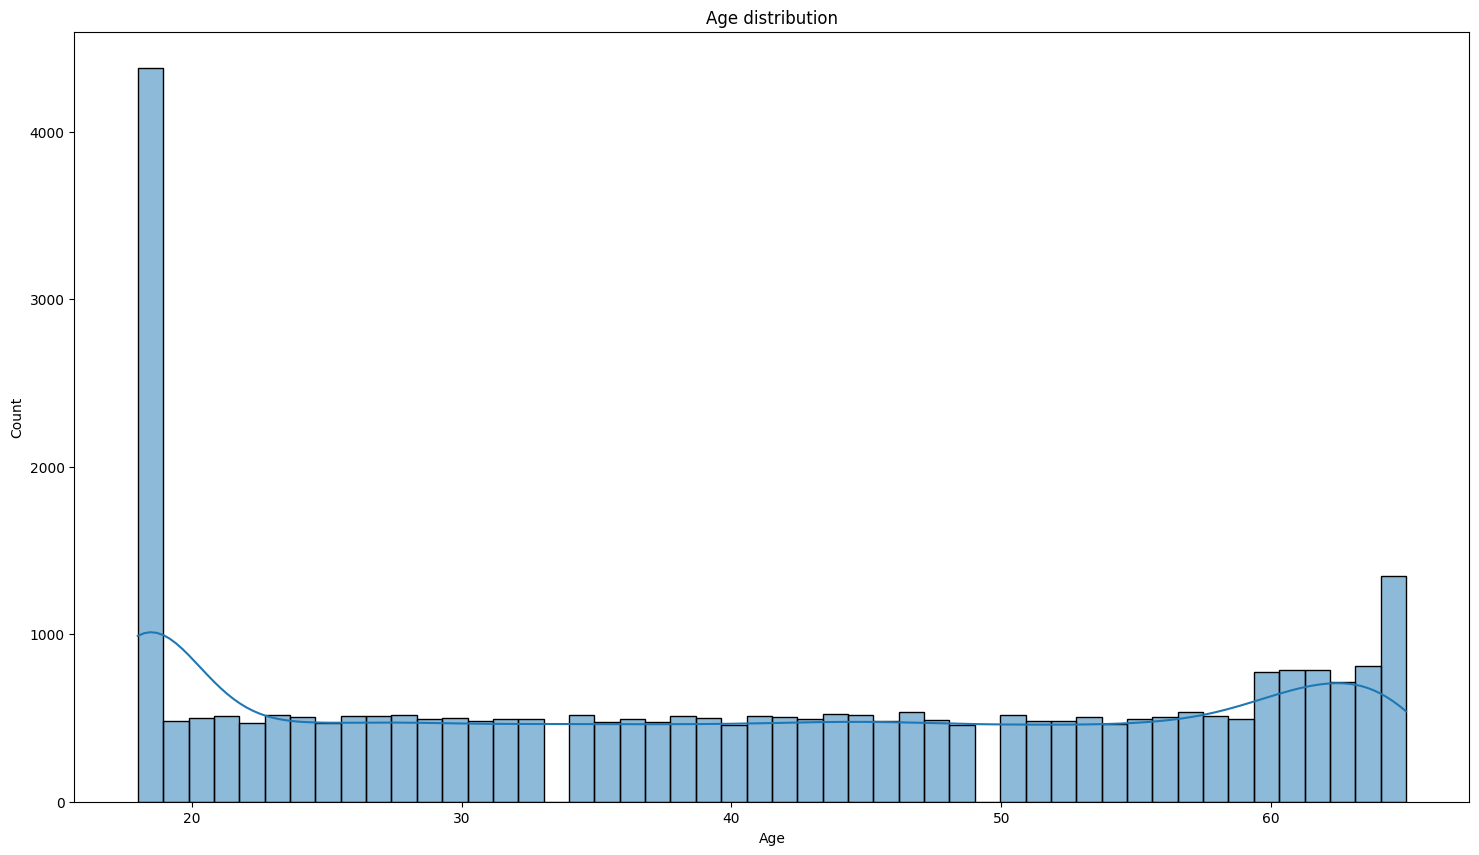

In [ ]:
create_hist_plot(num_df, 'Age', the_bins=50)

In [ ]:
missing_value_percentage(num_df, 'Age')

'The percentage of missing rows is 0.00%'

Interpretation:

Age is not normally distributed.

We have a large number of applicants who are 18 and 65 years old.

Mean and median of age is 40 years old.

# **Income (USD)**

In [ ]:
describe_feature(num_df, 'Income (USD)')

Description:
count    2.542400e+04
mean     2.630574e+03
std      1.126272e+04
min      3.777000e+02
25%      1.650457e+03
50%      2.222435e+03
75%      3.090593e+03
max      1.777460e+06
Name: Income (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
154.0017199982858


In [ ]:
missing_value_percentage(num_df, 'Income (USD)')

'The percentage of missing rows is 15.25%'

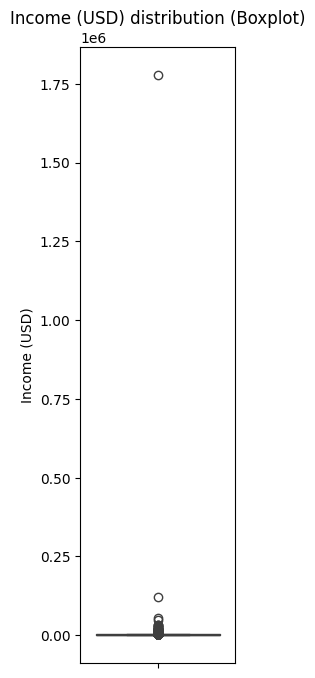

In [ ]:
create_box_plot(num_df, 'Income (USD)')

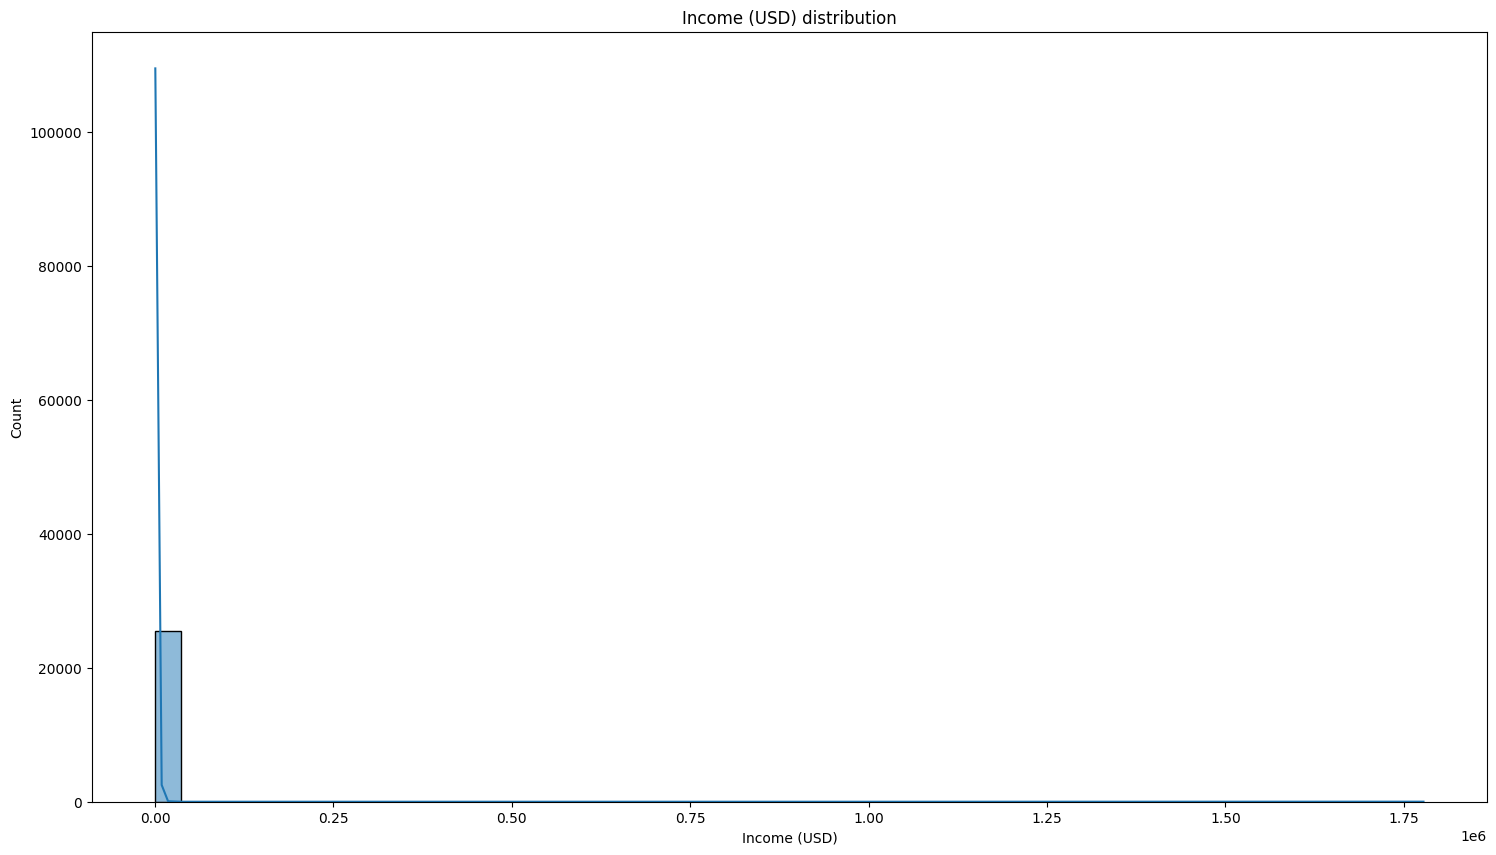

In [ ]:
create_hist_plot(num_df, 'Income (USD)', the_bins=50)

Interpretation:

The Income feature has 15% of its data missing.

The Income is positively skewed.

The Income has a lot of outliers.

The median income is $2229.

# **Loan Amount Request (USD)**

In [ ]:
describe_feature(num_df, 'Loan Amount Request (USD)')

Description:
count     30000.000000
mean      88826.333855
std       59536.949605
min        6048.240000
25%       41177.755000
50%       75128.075000
75%      119964.605000
max      621497.820000
Name: Loan Amount Request (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2603921833589773


In [ ]:
missing_value_percentage(num_df, 'Loan Amount Request (USD)')

'The percentage of missing rows is 0.00%'

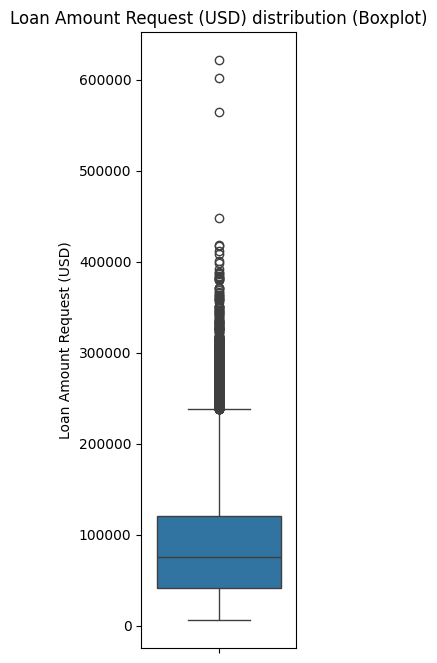

In [ ]:
create_box_plot(num_df, 'Loan Amount Request (USD)')

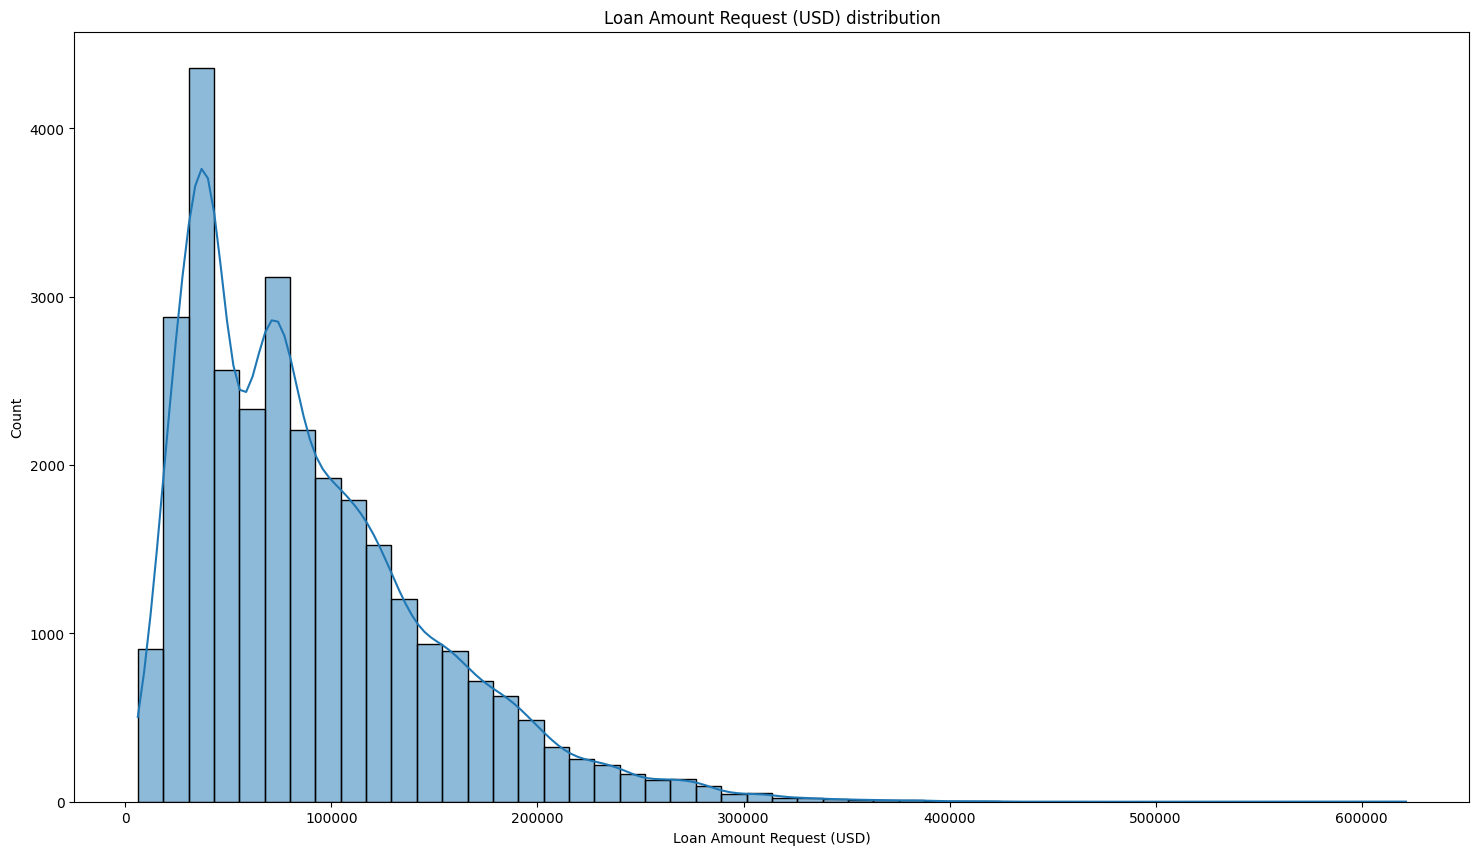

In [ ]:
create_hist_plot(num_df, 'Loan Amount Request (USD)', the_bins=50)

Interpretation:

The median of the loan amount request is $75326.655000.

We have quite a number of outliers in the loan amount request.

The loan amount request distribution is positively skewed.

# **Current Loan Expenses (USD)**

In [ ]:
describe_feature(num_df, 'Current Loan Expenses (USD)')

Description:
count    29828.000000
mean       400.936876
std        242.545375
min       -999.000000
25%        247.667500
50%        375.205000
75%        521.292500
max       3840.880000
Name: Current Loan Expenses (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
0.04432815526113482


In [ ]:
missing_value_percentage(num_df, 'Current Loan Expenses (USD)')

'The percentage of missing rows is 0.57%'

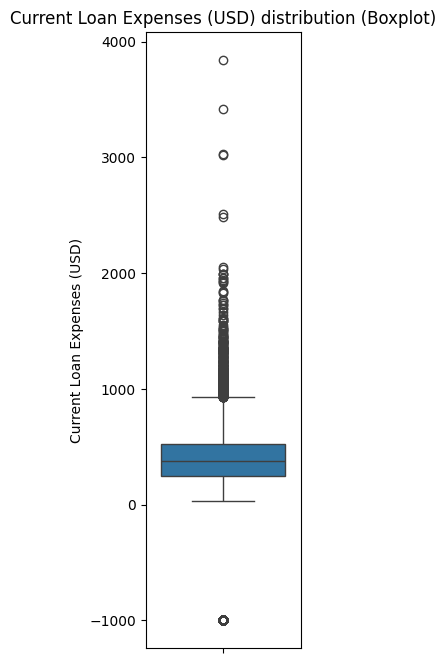

In [ ]:
create_box_plot(num_df, 'Current Loan Expenses (USD)')

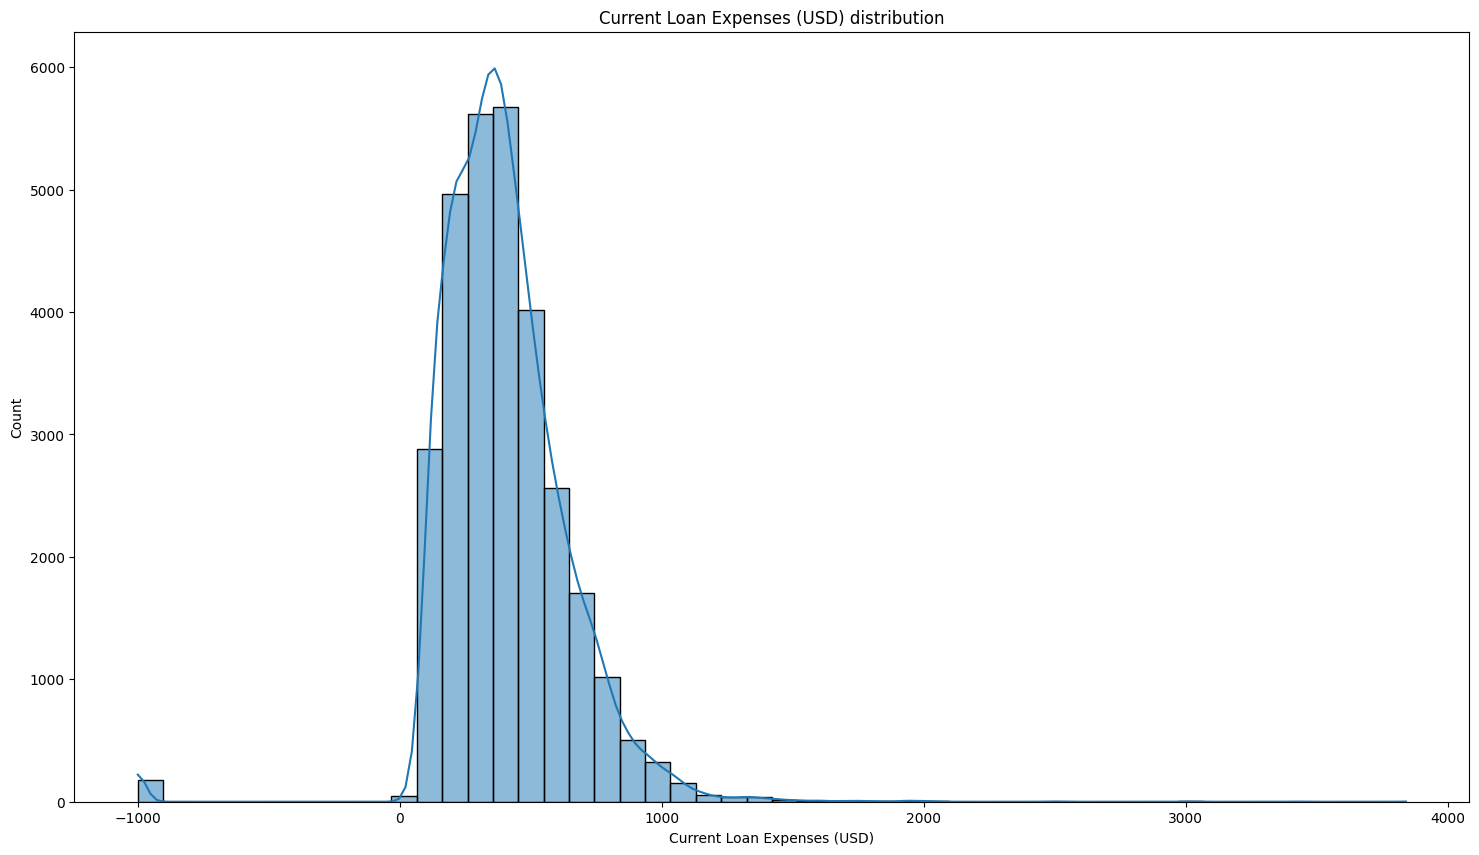

In [ ]:
create_hist_plot(num_df, 'Current Loan Expenses (USD)', the_bins=50)

Interpretation:

The mean current loan expenses is $375.275.

We have also some outliers.

The current loan expenses is positively skewed

# **Dependents**

In [ ]:
describe_feature(num_df, 'Dependents')

Description:
count    27507.000000
mean         2.253027
std          0.951162
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: Dependents, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
2.0   13108      47.653325
3.0    5719      20.791071
1.0    5544      20.154870
4.0    2704       9.830225
5.0     372       1.352383
6.0      50       0.181772
7.0       7       0.025448
8.0       1       0.003635
10.0      1       0.003635
14.0      1       0.003635


In [ ]:
missing_value_percentage(num_df, 'Dependents')

'The percentage of missing rows is 8.31%'

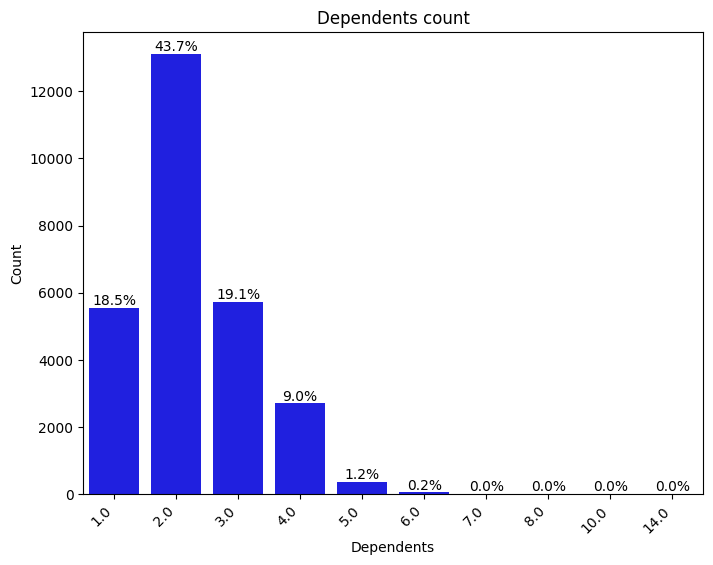

In [ ]:
create_bar_plot(num_df, 'Dependents')

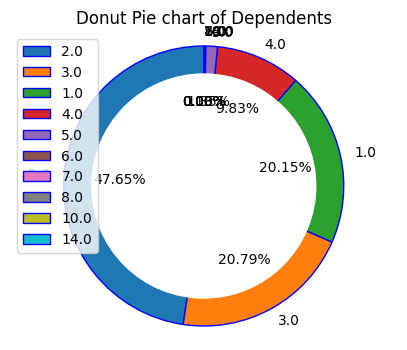

In [ ]:
create_donut_pie_chart(num_df, 'Dependents')

Interpretation:

Most applicants have 2 dependents.

Then 1 and 3 dependents are the second most common.

Then 4 and 5 and so on.

# **Credit Score:**

In [ ]:
describe_feature(num_df, 'Credit Score')

Description:
count    28297.000000
mean       739.885381
std         72.163846
min        580.000000
25%        681.880000
50%        739.820000
75%        799.120000
max        896.260000
Name: Credit Score, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.020255169213215216


In [ ]:
missing_value_percentage(num_df, 'Credit Score')

'The percentage of missing rows is 5.68%'

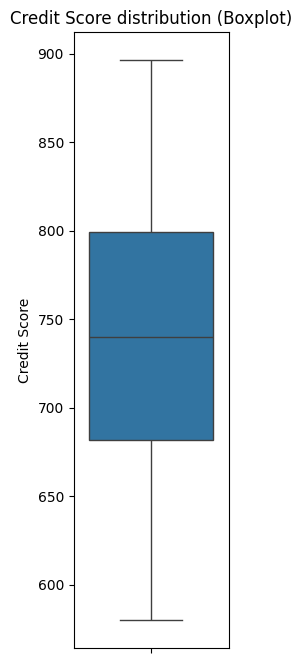

In [ ]:
create_box_plot(num_df, 'Credit Score')

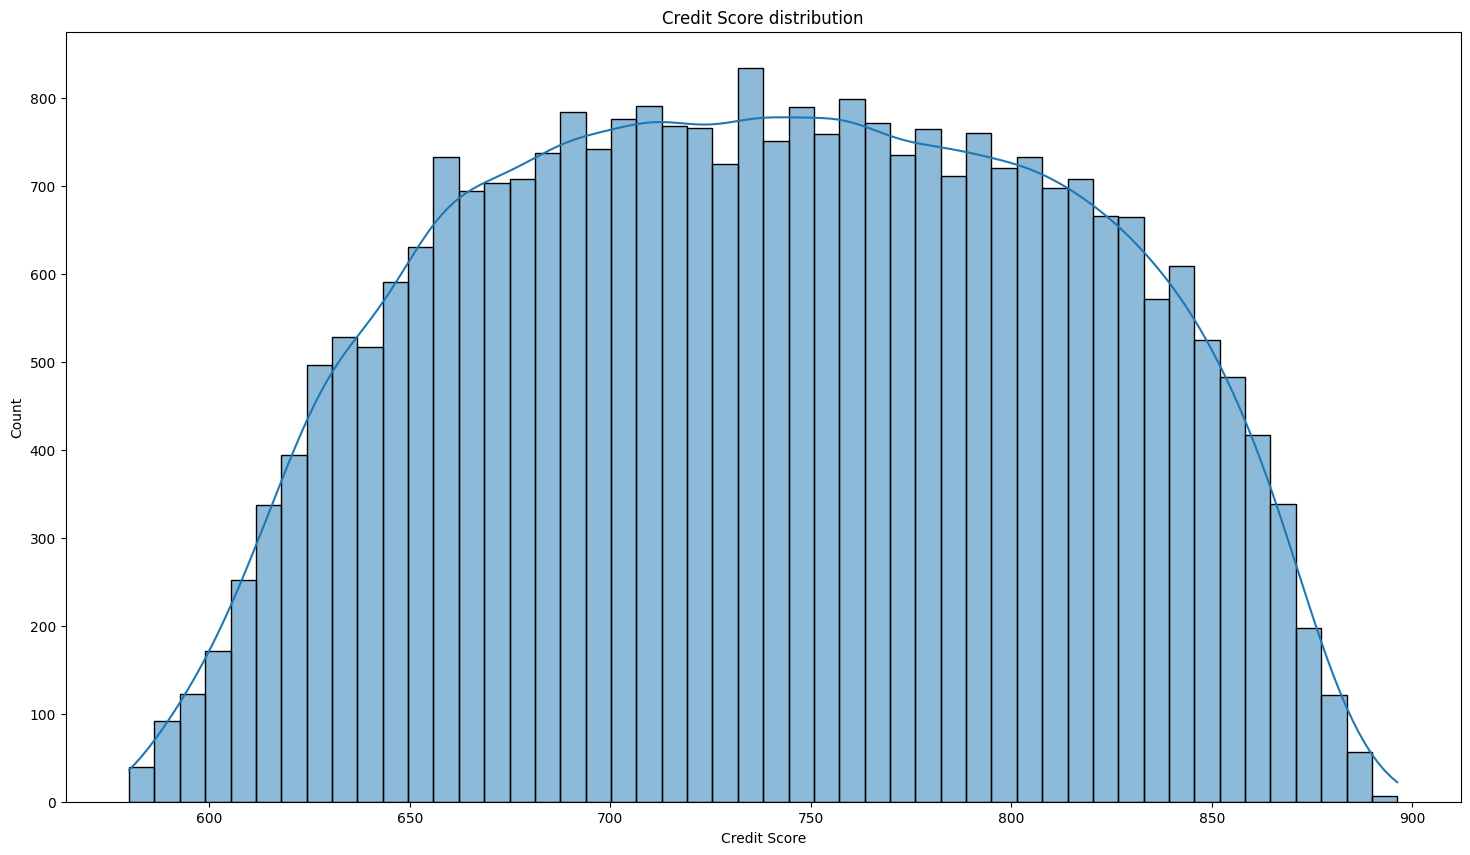

In [ ]:
create_hist_plot(num_df, 'Credit Score', the_bins=50)

Interpretation:

The mean and median of applicants's credit score is 739.

The credit score does not seems to be skewed but it is not normally distributed.

# **No. of Defaults**

In [ ]:
describe_feature(num_df, 'No. of Defaults')

Description:
count    30000.000000
mean         0.193933
std          0.395384
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No. of Defaults, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0  24182      80.606667
1   5818      19.393333


In [ ]:
missing_value_percentage(num_df, 'No. of Defaults')

'The percentage of missing rows is 0.00%'

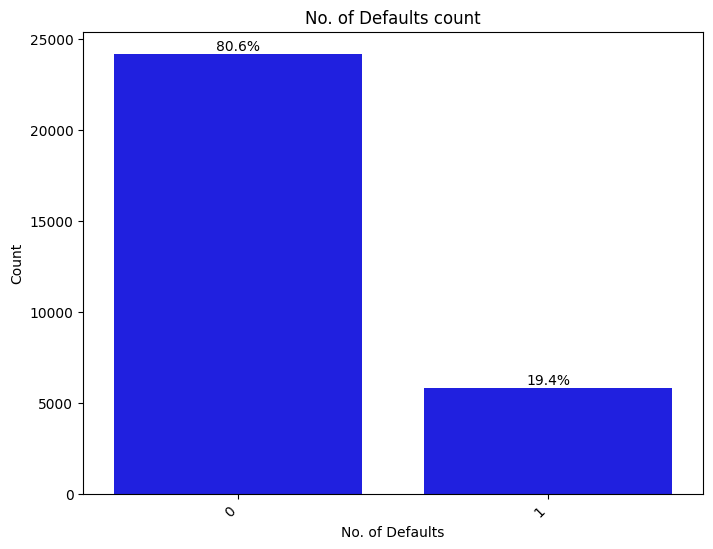

In [ ]:
create_bar_plot(num_df, 'No. of Defaults')

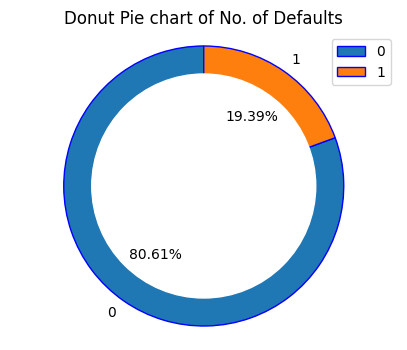

In [ ]:
create_donut_pie_chart(num_df, 'No. of Defaults')

nterpretation:

8 of 10 people don't have a any loan defaulted

# **Property Age**

In [ ]:
describe_feature(num_df, 'Property Age')

Description:
count      68.856947
mean        7.203612
std        30.999800
min         1.034086
25%         4.518686
50%         6.086927
75%         8.463812
max      4866.420835
Name: Property Age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
153.2196101099395


In [ ]:
missing_value_percentage(num_df, 'Property Age')

'The percentage of missing rows is 16.17%'

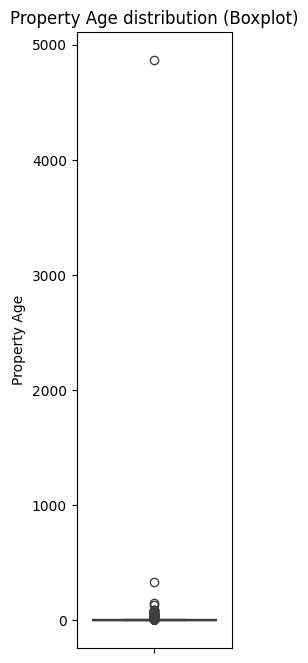

In [ ]:
create_box_plot(num_df, 'Property Age')

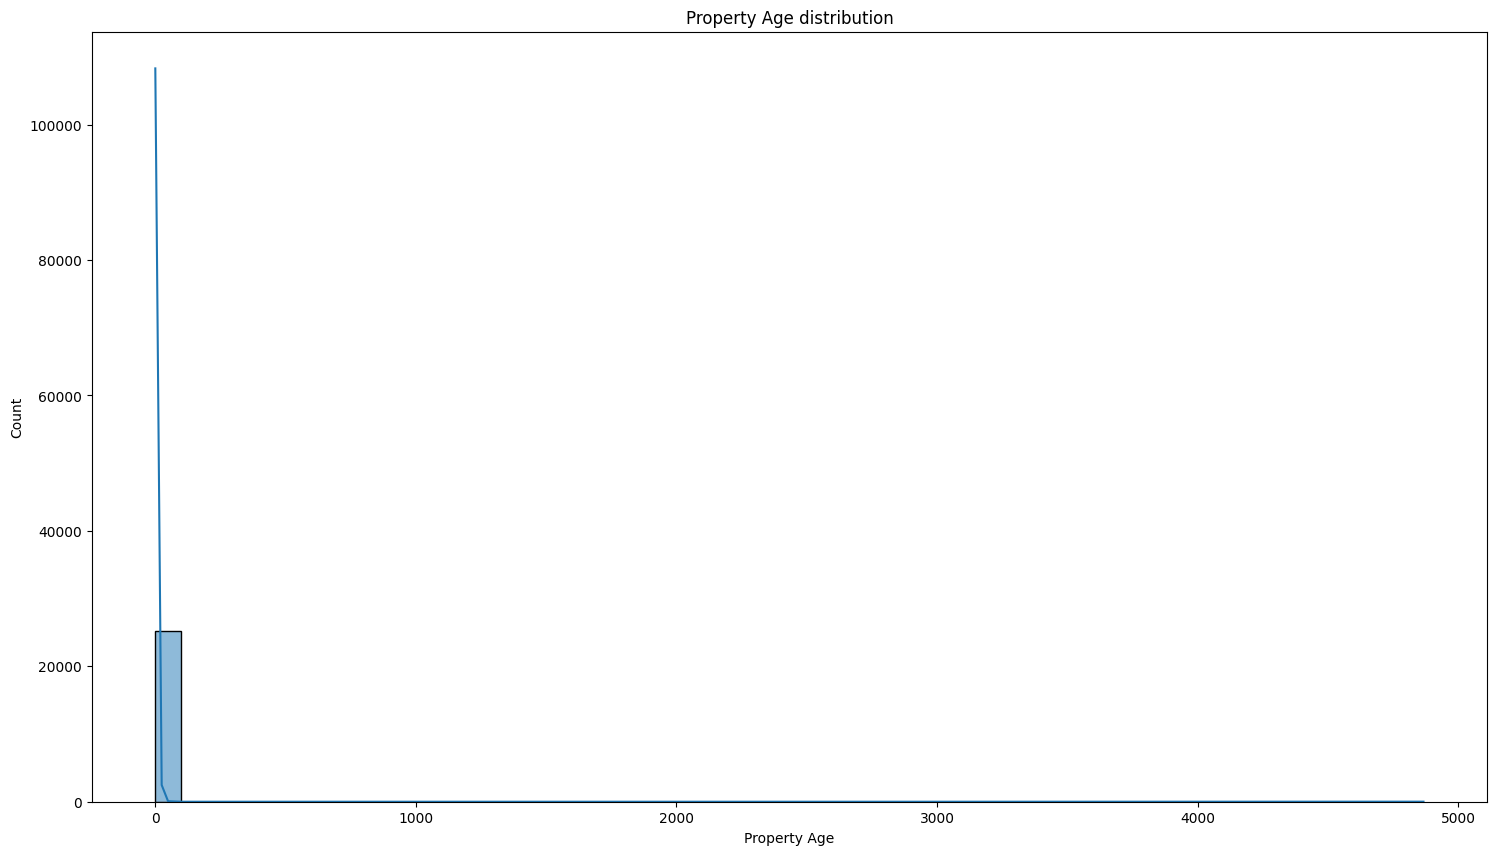

In [ ]:
create_hist_plot(num_df, 'Property Age')

Interpretation:

Assuming that the property age is expressed in days, most of properties have a median age of 2231 days(6.1 years).

 The property age distribution is positively skewed.

# **Property Type**

In [ ]:
describe_feature(num_df, 'Property Type')

Description:
count    30000.000000
mean         2.460067
std          1.118562
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Property Type, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
1   7863      26.210000
2   7650      25.500000
3   7309      24.363333
4   7178      23.926667


In [ ]:
missing_value_percentage(num_df, 'Property Type')

'The percentage of missing rows is 0.00%'

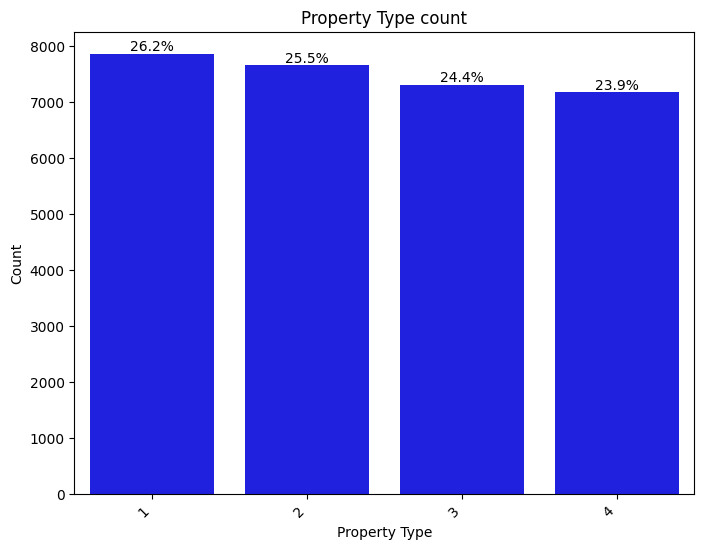

In [ ]:
create_bar_plot(num_df, 'Property Type')

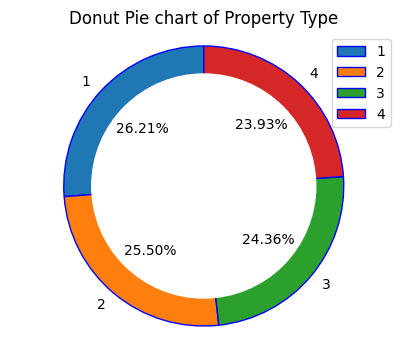

In [ ]:
create_donut_pie_chart(num_df, 'Property Type')

Interpretation:

We have almost an equal amount of property types, each with 25%.


# **Co-Applicant**

In [ ]:
describe_feature(num_df, 'Co-Applicant')

Description:
count    30000.000000
mean        -4.743867
std         74.614593
min       -999.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Co-Applicant, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
      Count  Frequency (%)
 1    25516      85.053333
 0     4316      14.386667
-999    168       0.560000


In [ ]:
missing_value_percentage(num_df, 'Co-Applicant')

'The percentage of missing rows is 0.00%'

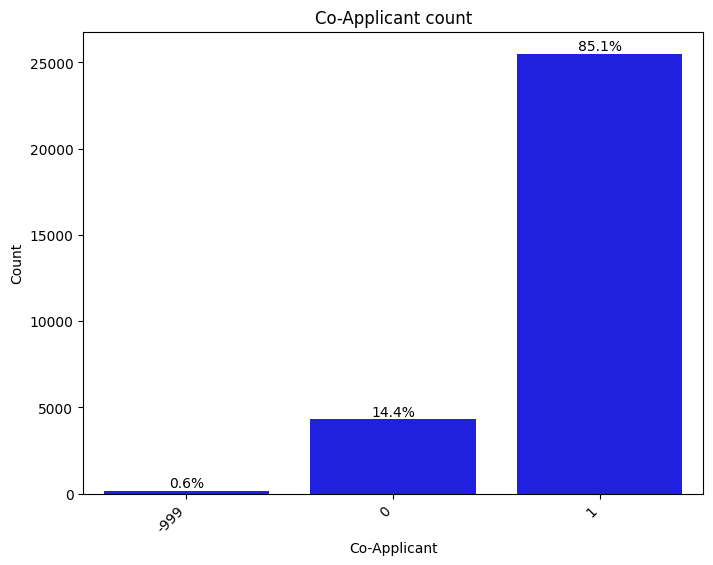

In [ ]:
create_bar_plot(num_df, 'Co-Applicant')

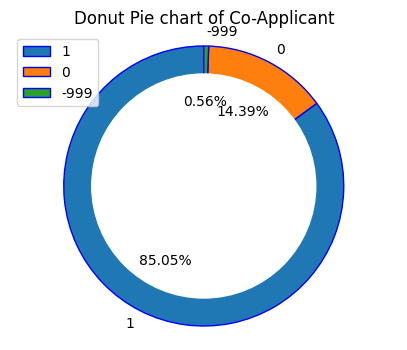

In [16]:
create_donut_pie_chart(num_df, 'Co-Applicant')

Interpretation:

Most of applicants have a co-applicants (~85%).

14% of applicants don't have a co-applicant.

The rest are unknown (~0.5%).


# **Property Price**

In [ ]:
describe_feature(num_df, 'Property Price')

Description:
count    3.000000e+04
mean     1.317597e+05
std      9.354955e+04
min     -9.990000e+02
25%      6.057216e+04
50%      1.099936e+05
75%      1.788807e+05
max      1.077967e+06
Name: Property Price, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.4169646295074756


In [ ]:
missing_value_percentage(num_df, 'Property Price')

'The percentage of missing rows is 0.00%'

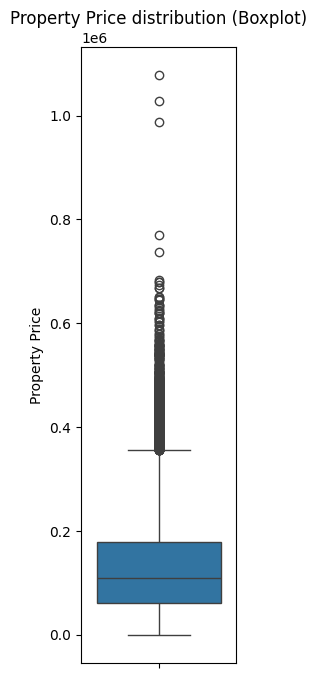

In [ ]:
create_box_plot(num_df, 'Property Price')

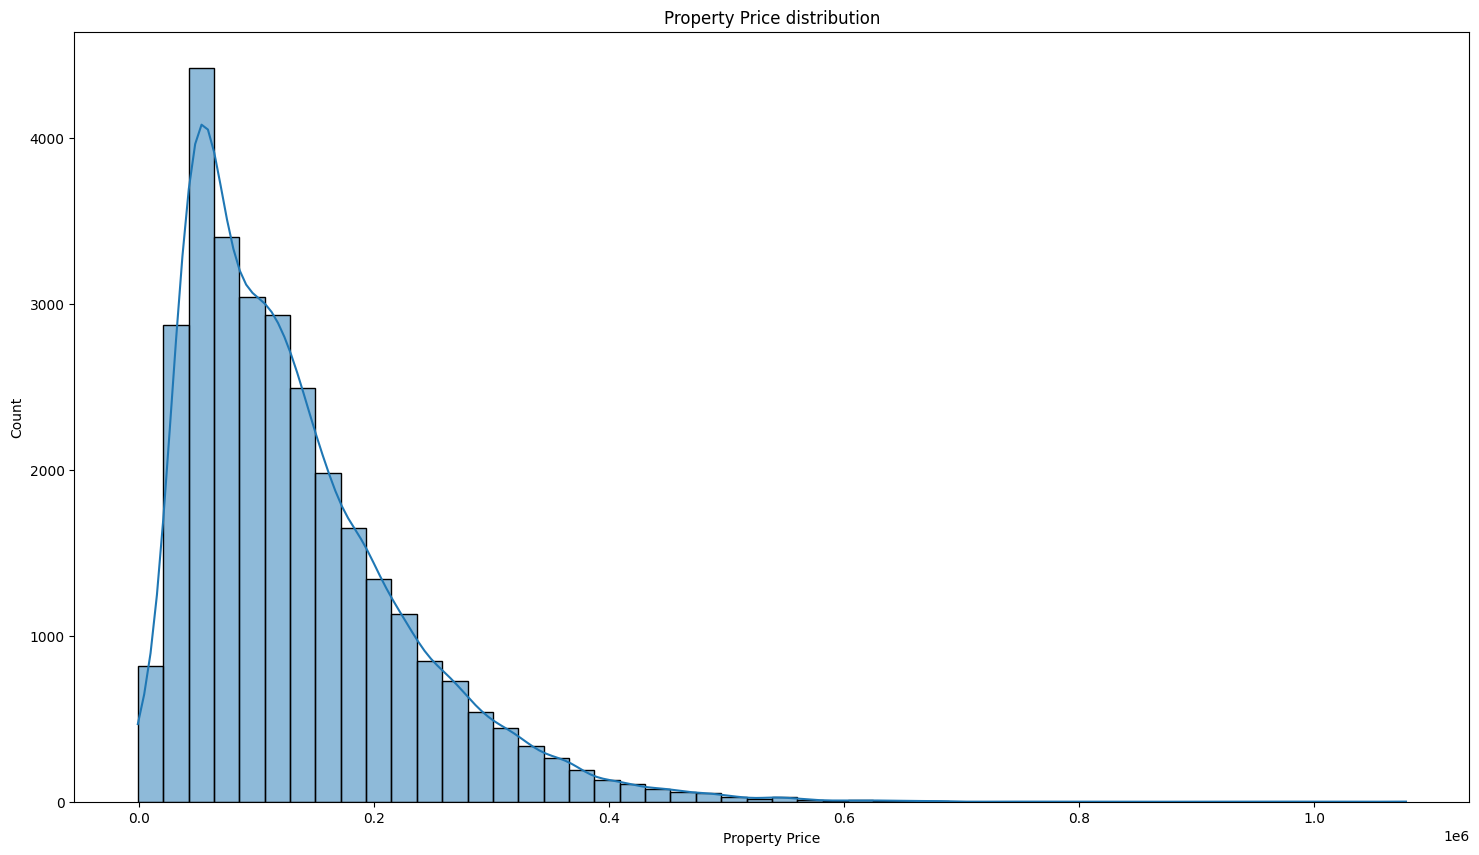

In [ ]:
create_hist_plot(num_df, 'Property Price', the_bins=50)

Interpretation:

The median property price is $110168.710. We have quite a number of outliers.

The distribution of the property price is skewed to the right.

# **Loan Sanction Amount (USD)**

In [ ]:
describe_feature(num_df, 'Loan Sanction Amount (USD)')

Description:
count     29660.000000
mean      47649.342208
std       48221.146686
min        -999.000000
25%           0.000000
50%       35209.395000
75%       74261.250000
max      481907.320000
Name: Loan Sanction Amount (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2299390309619023


In [ ]:
missing_value_percentage(num_df, 'Loan Sanction Amount (USD)')

'The percentage of missing rows is 1.13%'

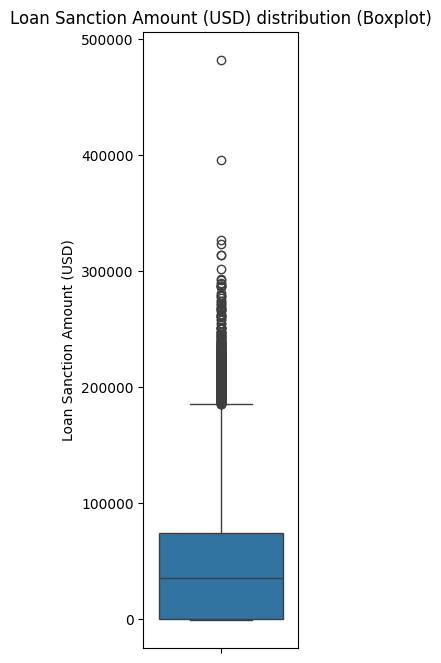

In [ ]:
create_box_plot(num_df, 'Loan Sanction Amount (USD)')

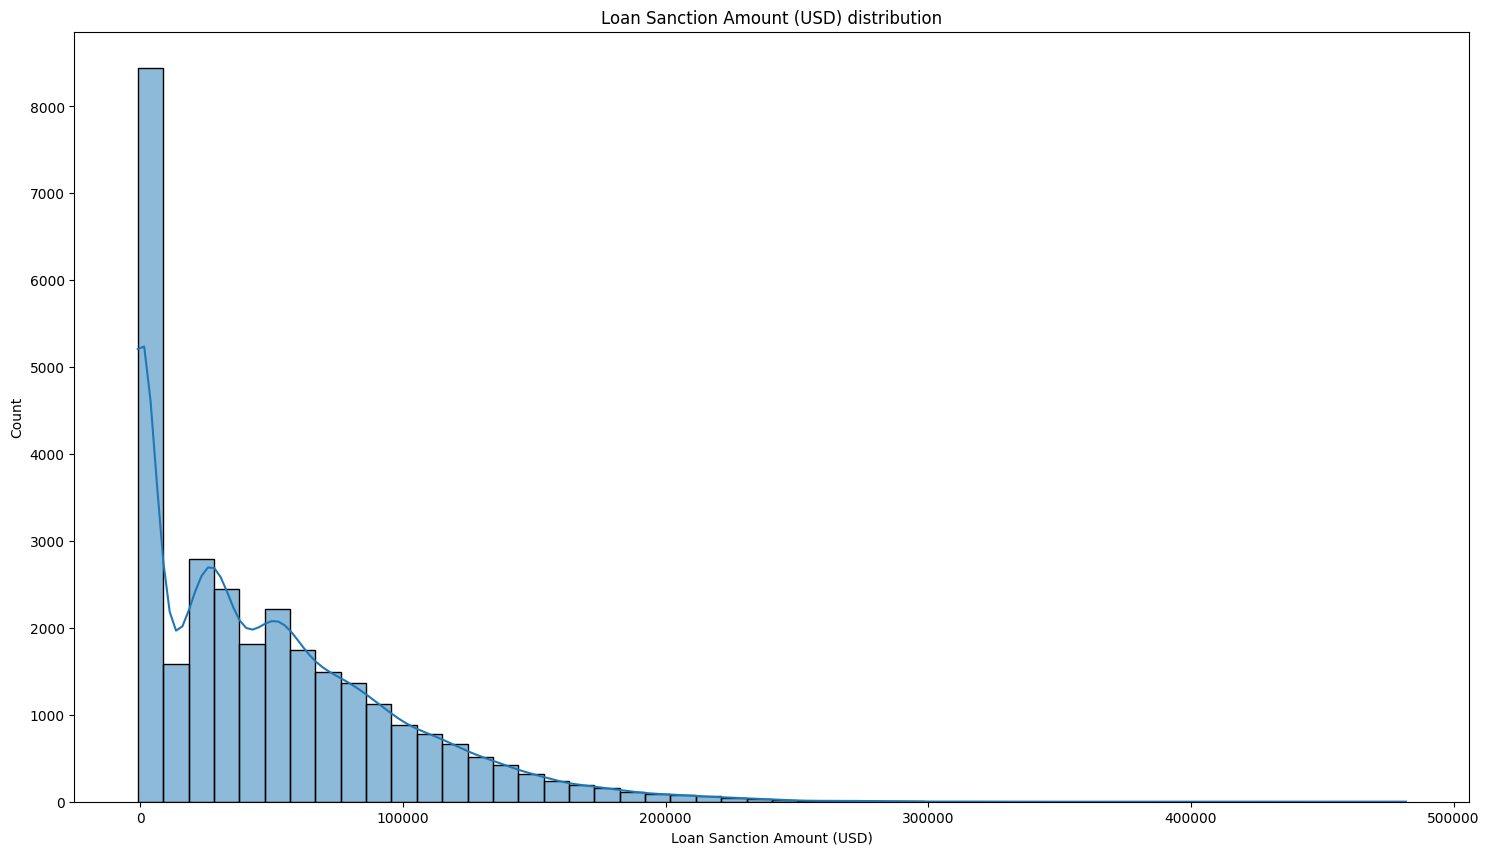

In [ ]:
create_hist_plot(num_df, 'Loan Sanction Amount (USD)', the_bins=50)

Interpretation:

The median loan sanction amount is $35273.020

We have quite a number of outliers.

The distribution of the loan sanction amount is skewed to the right.

# **Bivariate Analysis:**

# **Numerical vs categorical features (ANOVA):**

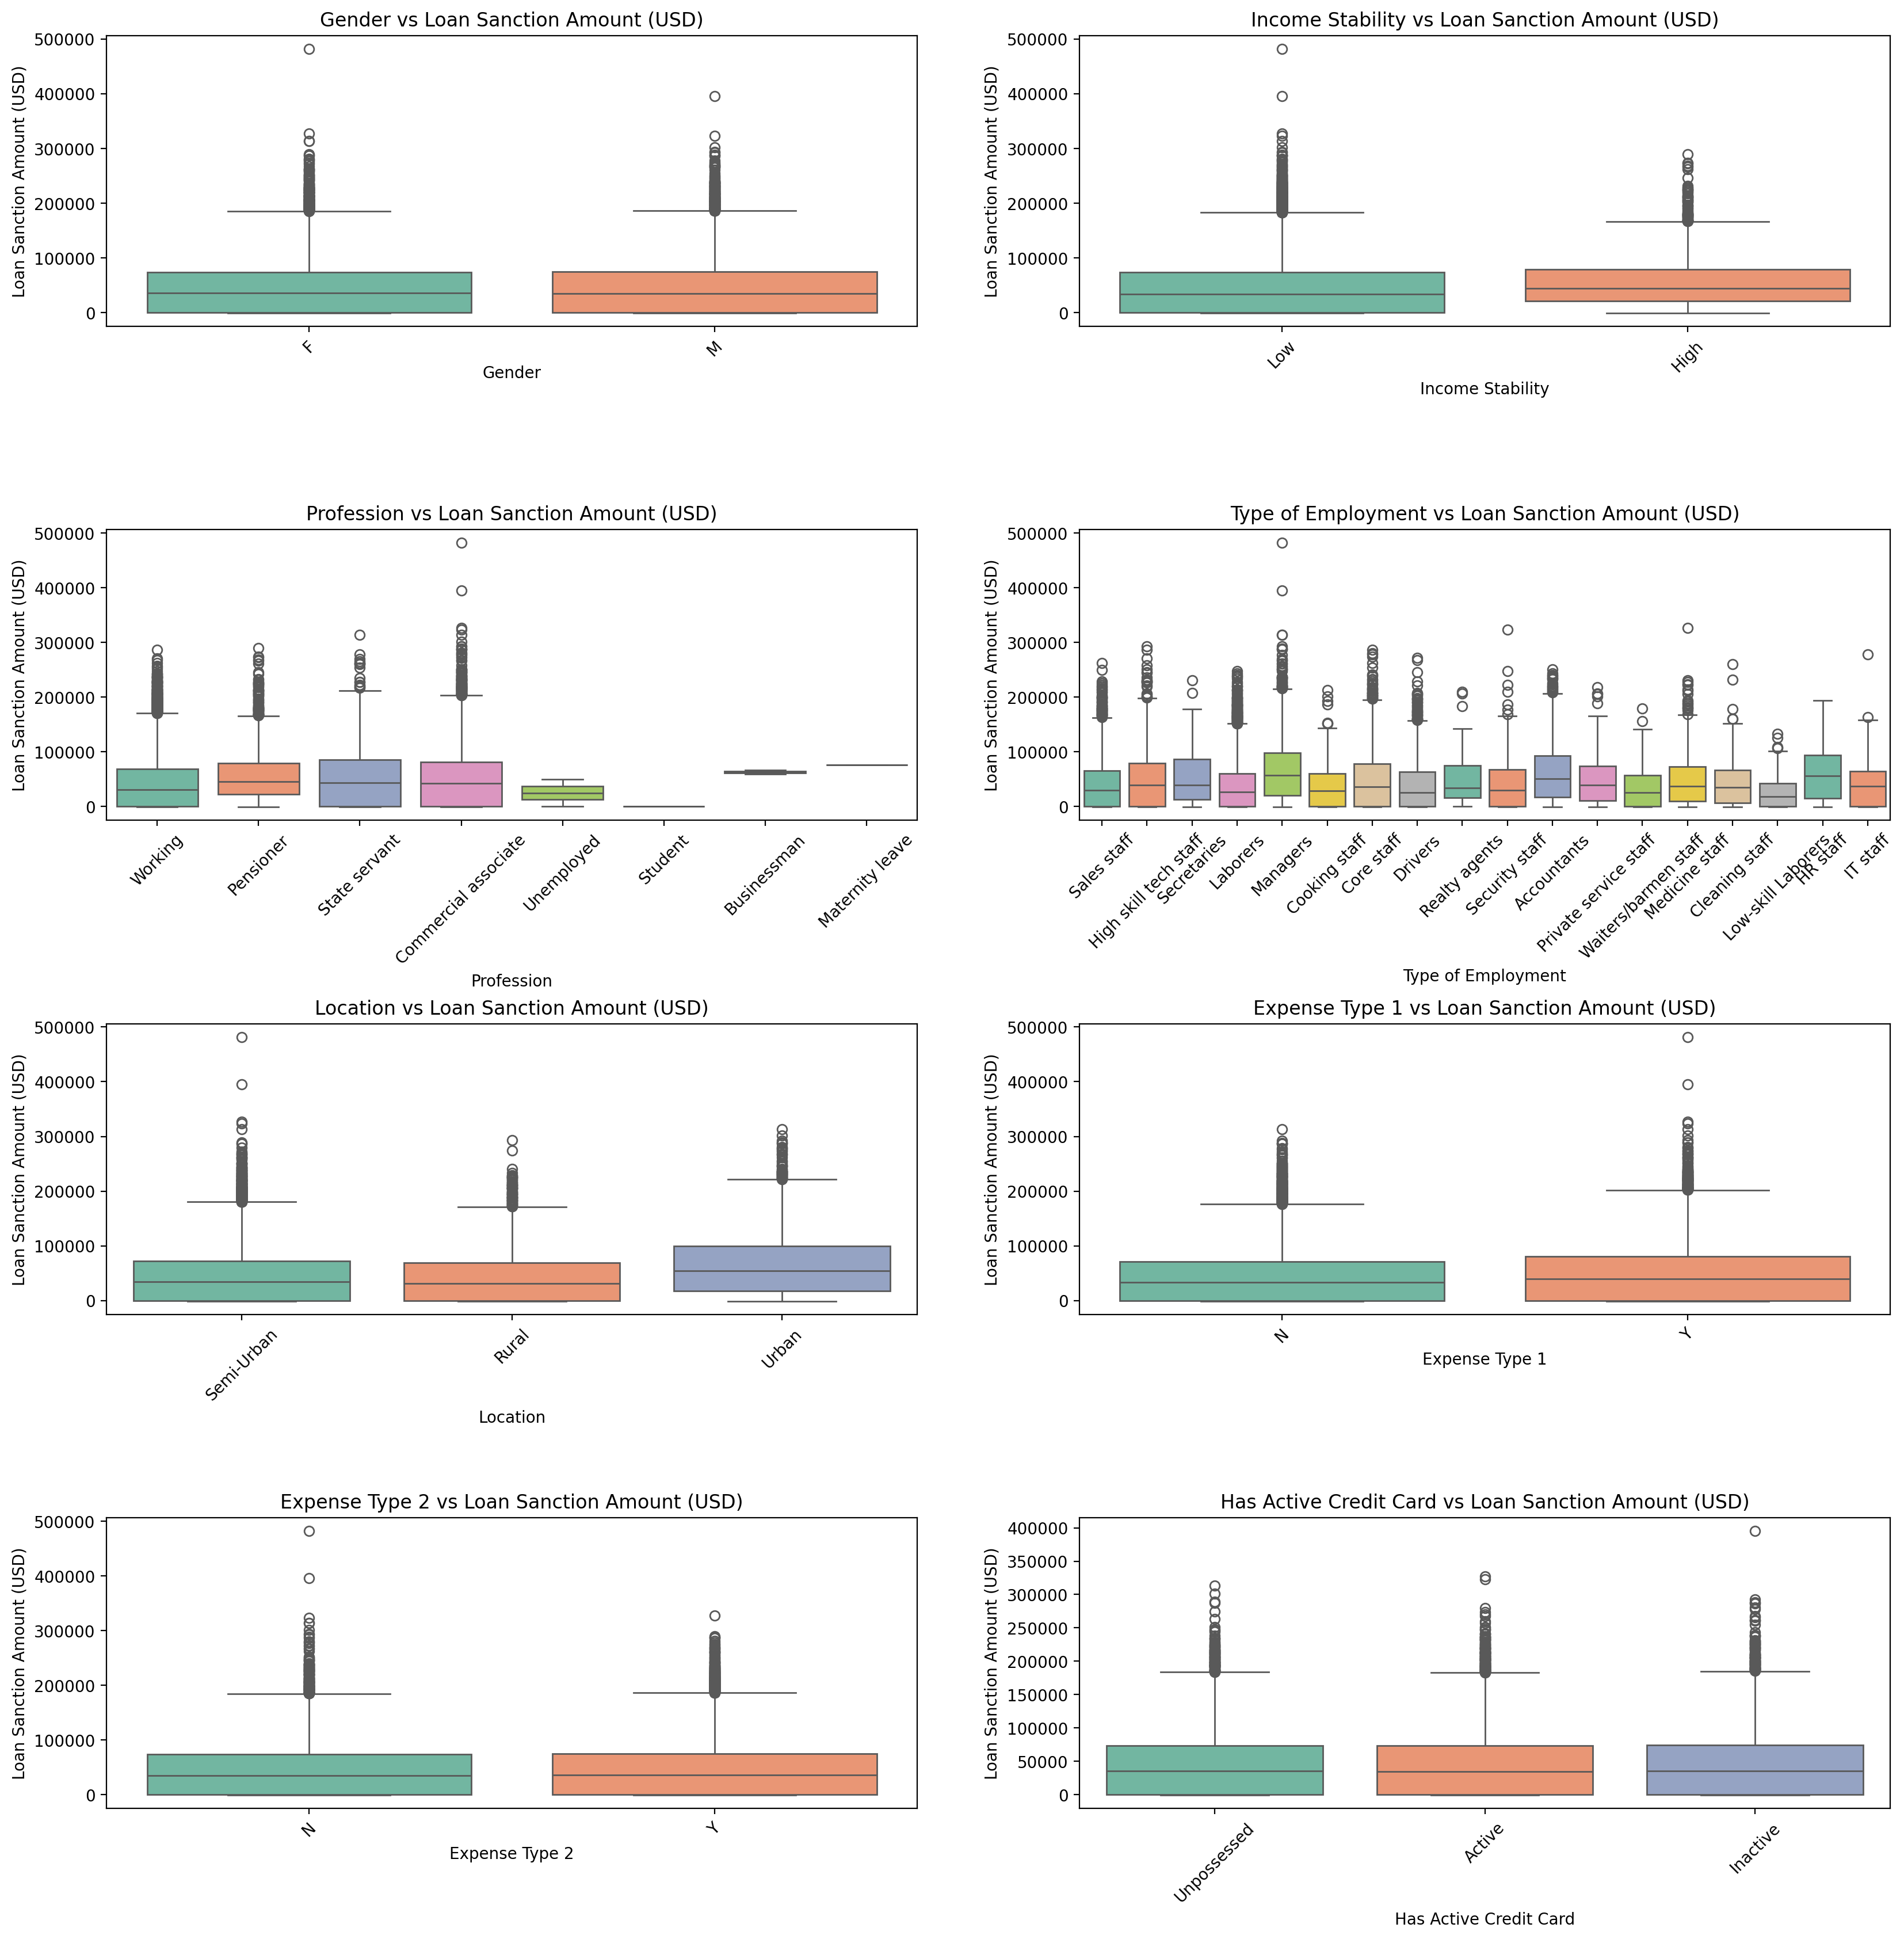

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical features
cat_features = ['Gender', 'Income Stability', 'Profession', 'Type of Employment',
                'Location', 'Expense Type 1', 'Expense Type 2',
                'Has Active Credit Card', 'Property Location']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20), dpi=200)

# Adjust the vertical space between subplots
plt.subplots_adjust(hspace=0.7)

# Iterate over each subplot
for i, ax in enumerate(axes.flat):
    # Plot boxplot for the current feature if available
    if i < len(cat_features):
        feature = cat_features[i]
        sns.boxplot(ax=ax, x=df[feature], y=df['Loan Sanction Amount (USD)'], hue=df[feature], palette='Set2', legend=False) # Assign x variable to hue and set legend=False

        # Set title and labels for the current subplot
        ax.set_title(f'{feature} vs Loan Sanction Amount (USD)')
        ax.set_ylabel('Loan Sanction Amount (USD)')

        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=45)
    else:
        # If no more features, remove the axis
        ax.axis('off')

# Display the plot
plt.show()


In [ ]:
axes

array([[<Axes: title={'center': 'Gender vs Loan Sanction Amount (USD)'}, xlabel='Gender', ylabel='Loan Sanction Amount (USD)'>,
        <Axes: title={'center': 'Income Stability vs Loan Sanction Amount (USD)'}, xlabel='Income Stability', ylabel='Loan Sanction Amount (USD)'>],
       [<Axes: title={'center': 'Profession vs Loan Sanction Amount (USD)'}, xlabel='Profession', ylabel='Loan Sanction Amount (USD)'>,
        <Axes: title={'center': 'Type of Employment vs Loan Sanction Amount (USD)'}, xlabel='Type of Employment', ylabel='Loan Sanction Amount (USD)'>],
       [<Axes: title={'center': 'Location vs Loan Sanction Amount (USD)'}, xlabel='Location', ylabel='Loan Sanction Amount (USD)'>,
        <Axes: title={'center': 'Expense Type 1 vs Loan Sanction Amount (USD)'}, xlabel='Expense Type 1', ylabel='Loan Sanction Amount (USD)'>],
       [<Axes: title={'center': 'Expense Type 2 vs Loan Sanction Amount (USD)'}, xlabel='Expense Type 2', ylabel='Loan Sanction Amount (USD)'>,
        <Axes

Interpretation:

People with high income stability were given a high loan sanction amount.

Managers, HR staff and accounts received a median loan sanction amount of $5000.

People who live in urban area received the highest loan sanction amount.

# **Scatter plots of Numerical vs numerical features:**

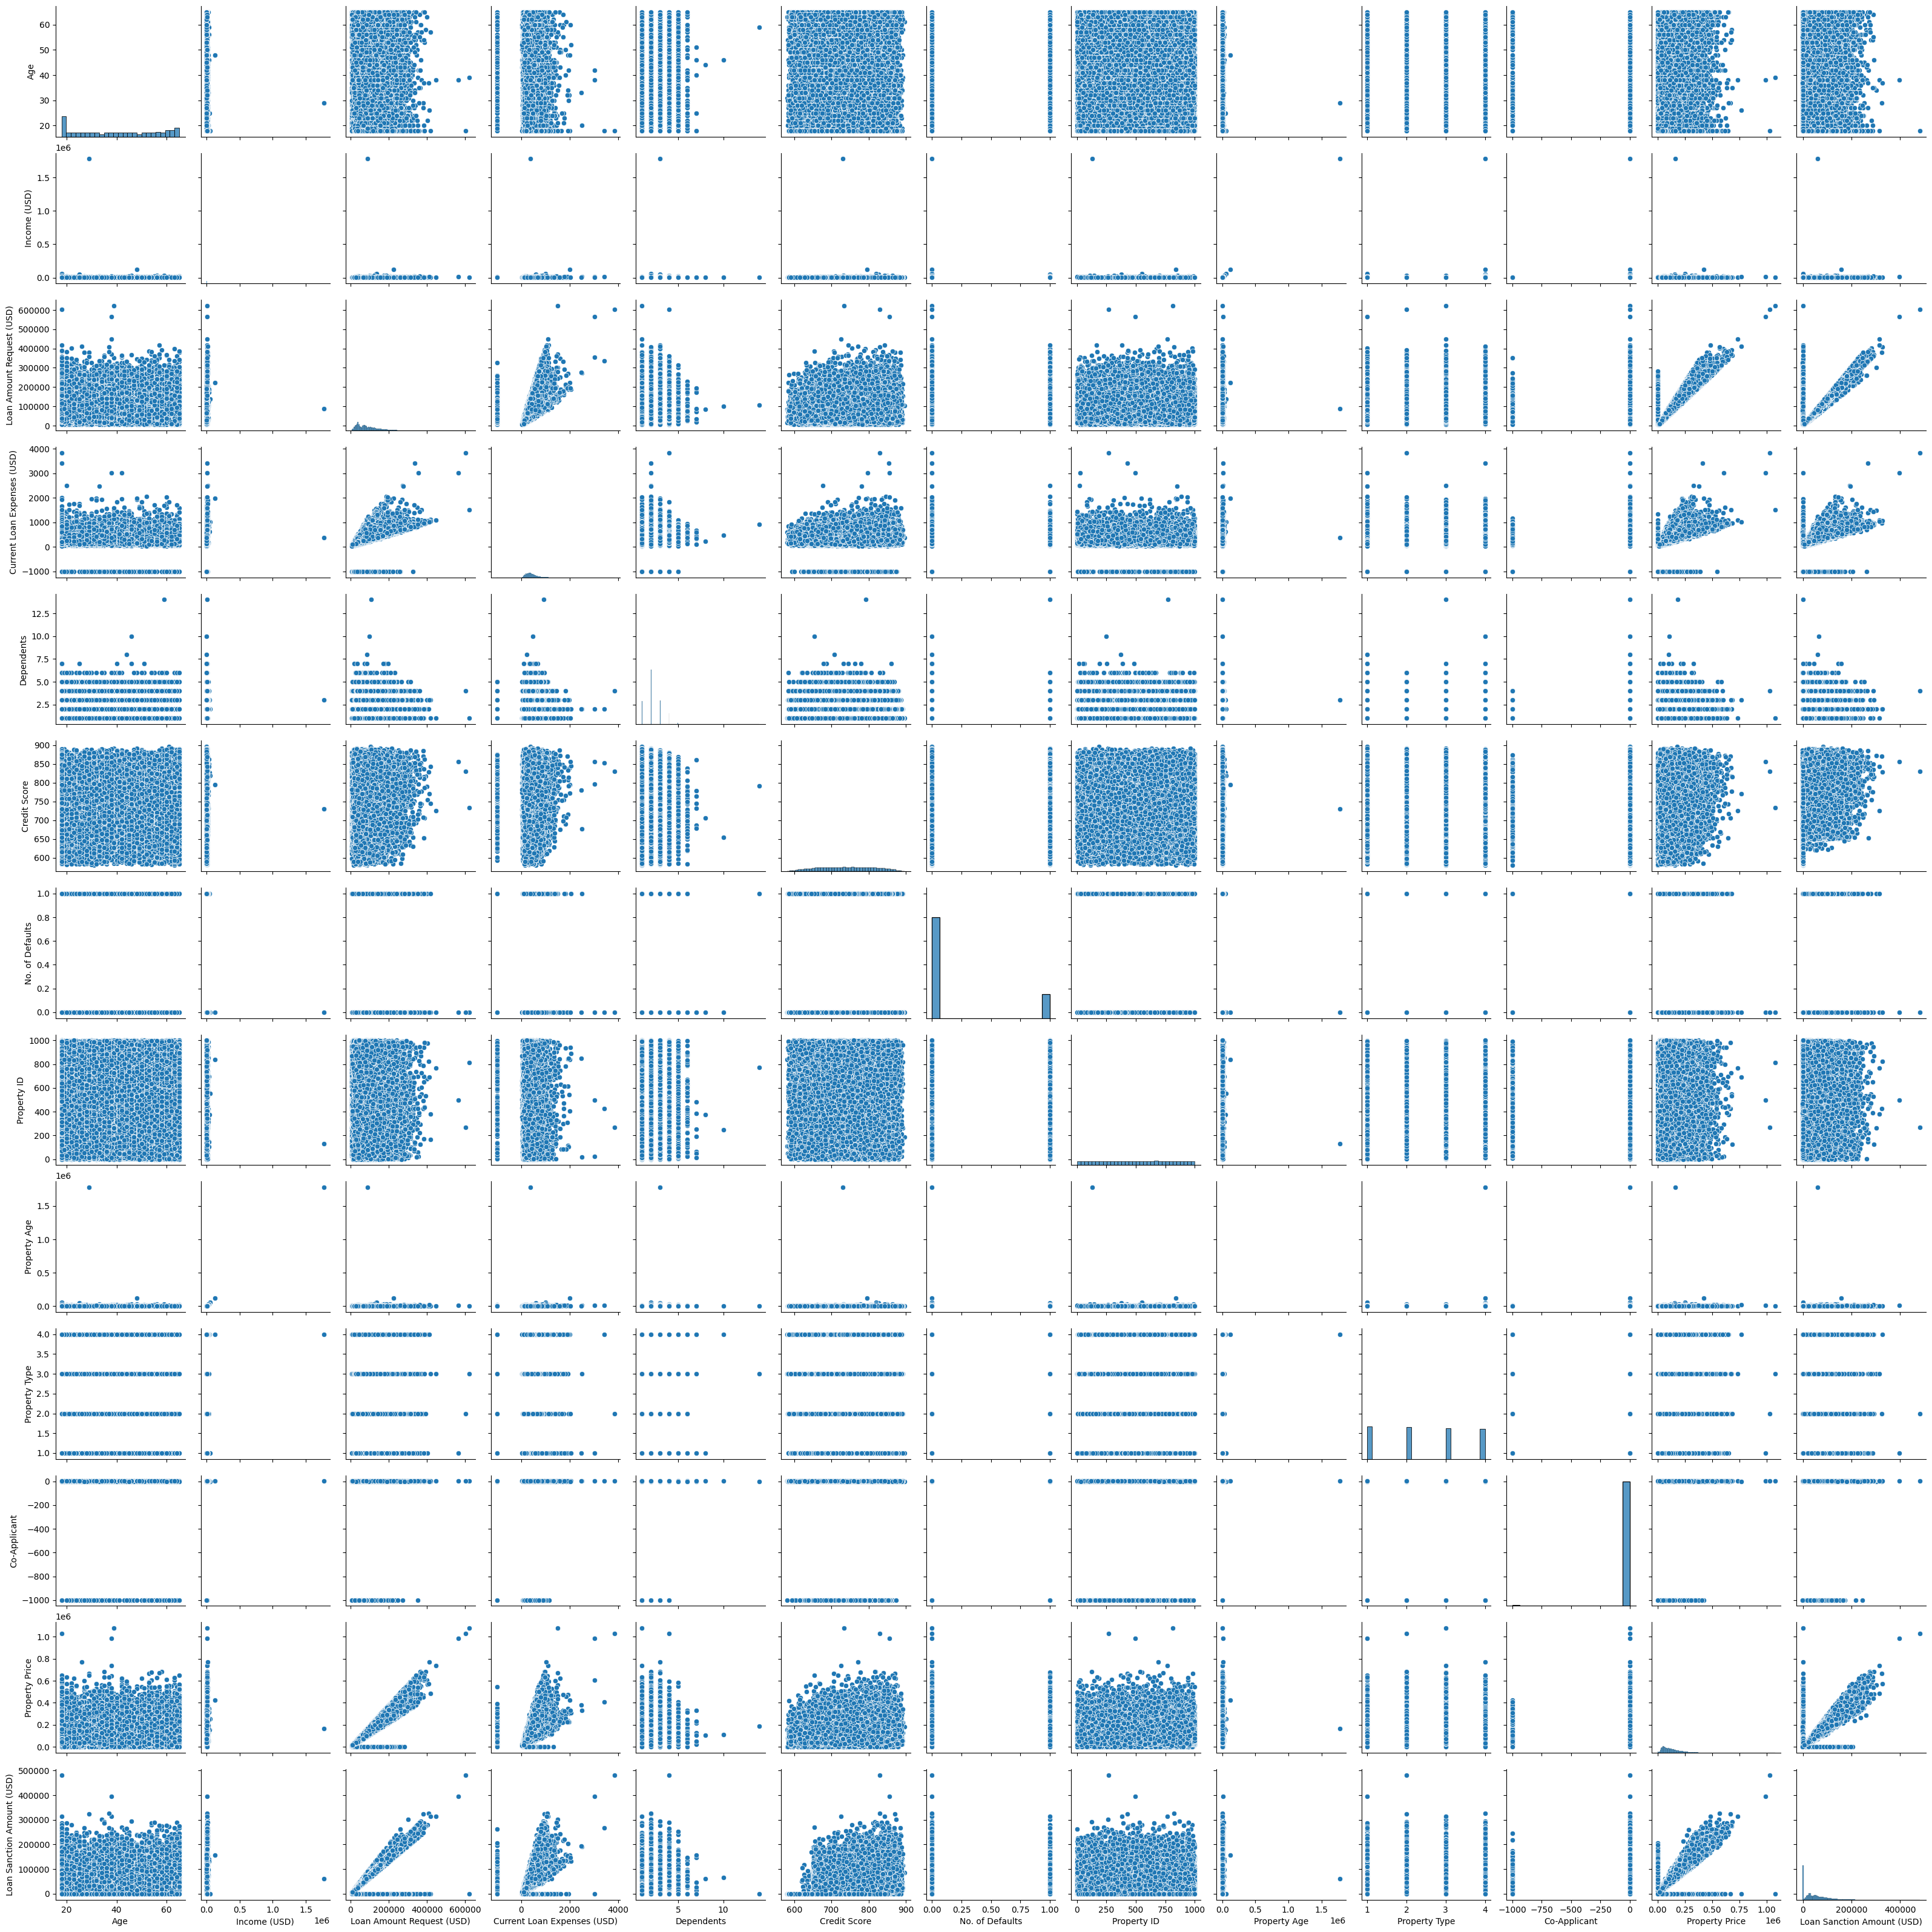

In [ ]:
sns.pairplot(num_df, corner=False)
plt.show()

Interpretation:

Loan sanction amount is  positively correlated with the loan amount request, the current loan expenses, property price.

There is also a perfect positive correlation between the income and the property age. (45 degree line).


# **Correlation Matrix:**

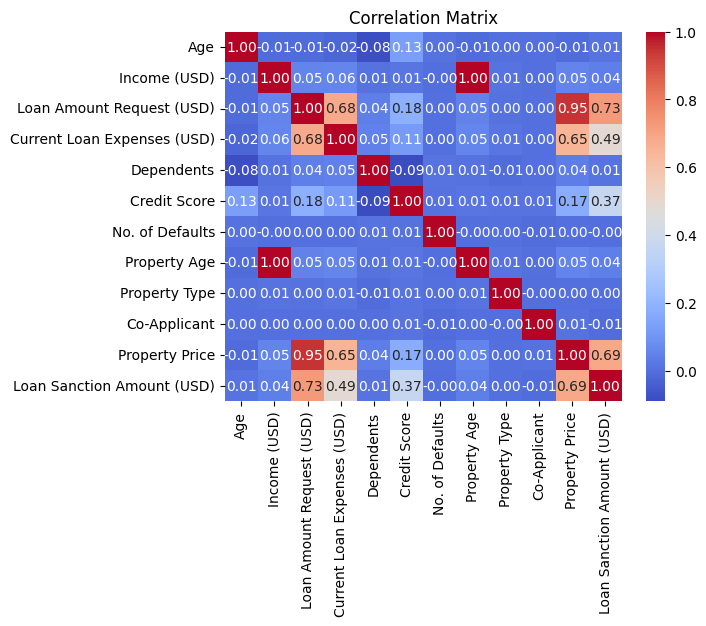

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = num_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Interpretation:

There is perfect correlation between Income and Property Age.

Also, there is a high correlation between Loan Amount Request and Property Price.

Loan sanctioin amount and Loan amount Request also corelately highly suggesting the same variable.

# **Transformations to be done for each feature**

Customer ID:

Drop the feature

Name:

Drop the feature

Gender:

One hot encoding

Missing value(Replace with the mode)

Age:
Min-max enc

Income:

Min-max enc

Outliers handler

Missing value (Replace with median)

Fix skewness

Income stability:
One hot encoding

Missing value (replace with the mode)

Profession:

One hot encoding

Drop the rows with the least frequent profession (Student, Businessman, Unemployed)

Type of employment

Drop some less frequent subclasses

Location:

One hot encoding

Loan amount request:

Min-max enc

Outliers handler

Fix skewness

Current loan expenses:

-999 handler

Min-max enc

Outliers handler

Missing value (replace with median)

Fix skewness

Expenses type 1:

One hot encoding

Expenses type 2:

One hot encoding

Dependents:

Outliers handler

Missing value (replace with mode)

Credit score:

Min-max enc

Missing value (replace with the mean/median)

Number of default:

Nothing to do

Has an active credit card:

One hot encoding

Missing value (replace with mode)

Property ID:

Drop feature

Property age:

Min-max enc

Outlier handler

Missing value (replace with the median)

Fix skewness

Property type:

Nothing

Property loc:

One hot encoding

Missing value (replace with mode)

Co- applicant:

-999 handler

Property price:

Min max

Outliers handler

Fix skewness

-999 handler

Loan sanction amount:

Missing value (Drop the rows)

-999 handler

# **Next steps:**

Handling Missing Values:

Handling Outliers:

Handling Rare Categories:

Encoding Categorical Variables:

Feature Scaling:

Feature Engineering:

Removing Unnecessary Columns:

Dealing with Continuous Target:

Splitting into Features and Target:


Train-Test Split:


# Handling Missing Values:

# Checking Missing values of each variable:

In [12]:
df=df1.copy()
df

Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56       1933.05   
1         C-33999  America Calderone      M   32       4952.91   
2          C-3770      Rosetta Verne      F   65        988.19   
3         C-26480         Zoe Chitty      F   65           NaN   
4         C-23459       Afton Venema      F   31       2614.77   
...           ...                ...    ...  ...           ...   
21050     C-44862     Marylee Dunker      M   46       1528.46   
21051     C-15080   Magdalena Seeber      F   39       1152.11   
21052     C-40761    Necole Ziebarth      M   41       3636.38   
21053     C-34164      Shyla Simpson      F   30       1640.10   
21054     C-24820     Marylee Seeger      M   19           NaN   

      Income Stability     Profession     Type of Employment    Location  \
0                  Low        Working            Sales staff  Semi-Urban   
1                  Low        Working                    NaN  Semi-Urban   
2                 High      Pensioner                    NaN  Semi-Urban   
3                 High      Pensioner                    NaN       Rural   
4                  Low        Working  High skill tech staff  Semi-Urban   
...                ...            ...                    ...         ...   
21050              Low        Working            Sales staff       Rural   
21051              Low  State servant                    NaN  Semi-Urban   
21052              Low  State servant                    NaN       Urban   
21053              Low        Working            Accountants       Rural   
21054              Low        Working               Managers        Semi   

       Loan Amount Request (USD)  ...  Credit Score No. of Defaults  \
0                       72809.58  ...        809.44             0.0   
1                       46837.47  ...        780.40             0.0   
2                       45593.04  ...        833.15             0.0   
3                       80057.92  ...        832.70             1.0   
4                      113858.89  ...        745.55             1.0   
...                          ...  ...           ...             ...   
21050                   79726.14  ...        692.19             0.0   
21051                   76507.86  ...        705.12             1.0   
21052                  100838.05  ...        787.46             1.0   
21053                   32696.80  ...        687.58             0.0   
21054                        NaN  ...           NaN             NaN   

      Has Active Credit Card  Property ID  Property Age  Property Type  \
0                        NaN        746.0       1933.05            4.0   
1                Unpossessed        608.0       4952.91            2.0   
2                Unpossessed        546.0        988.19            2.0   
3                Unpossessed        890.0           NaN            2.0   
4                     Active        715.0       2614.77            4.0   
...                      ...          ...           ...            ...   
21050                 Active        488.0       1528.46            4.0   
21051            Unpossessed        286.0       1152.11            2.0   
21052                    NaN        943.0       3636.38            1.0   
21053            Unpossessed        766.0       1640.10            3.0   
21054                    NaN          NaN           NaN            NaN   

      Property Location  Co-Applicant  Property Price  \
0                 Rural           1.0       119933.46   
1                 Rural           1.0        54791.00   
2                 Urban           0.0        72440.58   
3            Semi-Urban           1.0       121441.51   
4            Semi-Urban           1.0       208567.91   
...                 ...           ...             ...   
21050             Urban           1.0       129832.38   
21051             Urban           1.0       137134.64   
21052        Semi-Urban           1.0       1

In [13]:
df['Type of Employment'].value_counts()

Laborers                 3957
Sales staff              2636
Core staff               2235
Managers                 1750
Drivers                  1120
Accountants               987
High skill tech staff     903
Medicine staff            615
Security staff            397
Cooking staff             392
Cleaning staff            245
Private service staff     243
Low-skill Laborers        113
Secretaries               109
Waiters/barmen staff       99
Realty agents              62
IT staff                   56
HR staff                   53
Name: Type of Employment, dtype: int64

In [14]:
df = df.drop(columns=['Customer ID', 'Name','Property ID'])
df

Gender  Age  Income (USD) Income Stability     Profession  \
0          F   56       1933.05              Low        Working   
1          M   32       4952.91              Low        Working   
2          F   65        988.19             High      Pensioner   
3          F   65           NaN             High      Pensioner   
4          F   31       2614.77              Low        Working   
...      ...  ...           ...              ...            ...   
21050      M   46       1528.46              Low        Working   
21051      F   39       1152.11              Low  State servant   
21052      M   41       3636.38              Low  State servant   
21053      F   30       1640.10              Low        Working   
21054      M   19           NaN              Low        Working   

          Type of Employment    Location  Loan Amount Request (USD)  \
0                Sales staff  Semi-Urban                   72809.58   
1                        NaN  Semi-Urban                   46837.47   
2                        NaN  Semi-Urban                   45593.04   
3                        NaN       Rural                   80057.92   
4      High skill tech staff  Semi-Urban                  113858.89   
...                      ...         ...                        ...   
21050            Sales staff       Rural                   79726.14   
21051                    NaN  Semi-Urban                   76507.86   
21052                    NaN       Urban                  100838.05   
21053            Accountants       Rural                   32696.80   
21054               Managers        Semi                        NaN   

       Current Loan Expenses (USD) Expense Type 1  ... Dependents  \
0                           241.08              N  ...        3.0   
1                           495.81              N  ...        1.0   
2                           171.95              N  ...        1.0   
3                           298.54              N  ...        2.0   
4                           491.41              N  ...        NaN   
...                            ...            ...  ...        ...   
21050                       465.70              N  ...        2.0   
21051                       385.34              N  ...        NaN   
21052                       571.54              N  ...        3.0   
21053                       174.45              Y  ...        3.0   
21054                          NaN            NaN  ...        NaN   

       Credit Score  No. of Defaults  Has Active Credit Card Property Age  \
0            809.44              0.0                     NaN      1933.05   
1            780.40              0.0             Unpossessed      4952.91   
2            833.15              0.0             Unpossessed       988.19   
3            832.70              1.0             Unpossessed          NaN   
4            745.55              1.0                  Active      2614.77   
...             ...              ...                     ...          ...   
21050        692.19              0.0                  Active      1528.46   
21051        705.12              1.0             Unpossessed      1152.11   
21052        787.46              1.0                     NaN      3636.38   
21053        687.58              0.0             Unpossessed      1640.10   
21054           NaN              NaN                     NaN          NaN   

       Property Type  Property Location Co-Applicant  Property Price  \
0                4.0              Rural          1.0       119933.46   
1                2.0              Rural          1.0        54791.00   
2                2.0              Urban          0.0        72440.58   
3                2.0         Semi-Urban          1.0       121441.51   
4                4.0         Semi-Urban          1.0       208567.91   
...              ...                ...          ...             ...   
21050            4.0              Urban          1.0       129832.38   
21051            2

# **Handling Missing Values:**

In [15]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Numerical columns: Apply imputer to fill missing values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Categorical columns: Apply imputer to fill missing values
categorical_cols = df.select_dtypes(exclude=np.number).columns
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [16]:
missing_values = df.isnull().sum()
missing_values

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

# **Handling Outliers:**

In [17]:
from scipy import stats

# Define a function to handle outliers using Z-score
def handle_outliers(df, threshold=3):
    # Calculate Z-scores for each numerical column
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

    # Find indices of outliers
    outlier_indices = np.where(z_scores > threshold)

    # Remove outliers from DataFrame
    df_no_outliers = df.drop(outlier_indices[0])

    return df_no_outliers

# Call the function to handle outliers in the DataFrame
df = handle_outliers(df)

# **Handling Rare Categories:**

In [18]:
import pandas as pd

def handle_rare_categories(df, column_name, threshold):
    # Calculate the frequency of each category
    category_counts = df[column_name].value_counts(normalize=True)

    # Identify rare categories based on the threshold
    rare_categories = category_counts[category_counts < threshold].index

    # Get the most frequent category
    most_frequent_category = df[column_name].mode()[0]

    # Replace rare categories with the most frequent category
    df[column_name] = df[column_name].replace(rare_categories, most_frequent_category)

    return df

# Get list of categorical columns
cat_cols = df.select_dtypes(exclude='number').columns

# Apply handle_rare_categories function to each categorical column
for col in cat_cols:
    df = handle_rare_categories(df, col, 0.05)

In [19]:
df['Profession'].value_counts()

Working                 11349
Commercial associate     5252
Pensioner                1838
State servant            1573
Name: Profession, dtype: int64

# **Saving target variable before scaling**

In [20]:
y=df['Loan Sanction Amount (USD)']#we dont wanna scale target variable for easier interpritation
y = pd.DataFrame(y)
y.head(3)

Loan Sanction Amount (USD)
0                    54607.18
1                    37469.98
2                    36474.43

# **Encoding Categorical Variables and Feature Scaling:**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd

# Define column indices for numerical and categorical columns
categorical_cols = df.select_dtypes(exclude='number').columns
numerical_cols = df.select_dtypes(include='number').columns.drop('Loan Sanction Amount (USD)')

# Define the transformations for each type of column
categorical_transformer = OneHotEncoder()

numerical_transformer = MinMaxScaler()

# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Apply preprocessing to the DataFrame
df_transformed = preprocessor.fit_transform(df)

# Get the fitted OneHotEncoder from the preprocessor
fitted_encoder = preprocessor.named_transformers_['cat']

# Get the column names for the transformed DataFrame
encoded_cat_cols = list(fitted_encoder.get_feature_names_out(categorical_cols))
columns = encoded_cat_cols + list(numerical_cols)

# Convert the transformed data to a DataFrame
df = pd.DataFrame(df_transformed, columns=columns)
df.head(5)


Gender_F  Gender_M  Income Stability_High  Income Stability_Low  \
0       1.0       0.0                    0.0                   1.0   
1       0.0       1.0                    0.0                   1.0   
2       1.0       0.0                    1.0                   0.0   
3       1.0       0.0                    1.0                   0.0   
4       1.0       0.0                    0.0                   1.0   

   Profession_Commercial associate  Profession_Pensioner  \
0                              0.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   1.0   
3                              0.0                   1.0   
4                              0.0                   0.0   

   Profession_State servant  Profession_Working  \
0                       0.0                 1.0   
1                       0.0                 1.0   
2                       0.0                 0.0   
3                       0.0                 0.0   
4                       0.0                 1.0   

   Type of Employment_Core staff  Type of Employment_Drivers  ...  \
0                            0.0                         0.0  ...   
1                            0.0                         0.0  ...   
2                            0.0                         0.0  ...   
3                            0.0                         0.0  ...   
4                            0.0                         0.0  ...   

   Income (USD)  Loan Amount Request (USD)  Current Loan Expenses (USD)  \
0      0.049356                   0.257402                     0.190706   
1      0.145261                   0.157265                     0.425340   
2      0.019350                   0.152467                     0.127030   
3      0.072286                   0.285349                     0.243633   
4      0.071007                   0.415670                     0.421287   

   Dependents  Credit Score  No. of Defaults  Property Age  Property Type  \
0    0.666667      0.724739              0.0      0.049356       1.000000   
1    0.000000      0.632669              0.0      0.145261       0.333333   
2    0.000000      0.799911              0.0      0.019350       0.333333   
3    0.333333      0.798485              1.0      0.072339       0.333333   
4    0.418323      0.522177              1.0      0.071007       1.000000   

   Co-Applicant  Property Price  
0      1.000000        0.294494  
1      1.000000        0.135859  
2      0.831571        0.178840  
3      1.000000        0.298166  
4      1.000000        0.510336  

[5 rows x 37 columns]

# **Removing Unnecessary (Highly correlated) Columns:**

Since there is a high correlation between Loan Amount Request and Property Price, we are going to drop the Loan Amount Request.

In [22]:
df.columns

Index(['Gender_F', 'Gender_M', 'Income Stability_High', 'Income Stability_Low',
       'Profession_Commercial associate', 'Profession_Pensioner',
       'Profession_State servant', 'Profession_Working',
       'Type of Employment_Core staff', 'Type of Employment_Drivers',
       'Type of Employment_Laborers', 'Type of Employment_Managers',
       'Type of Employment_Sales staff', 'Location_Rural',
       'Location_Semi-Urban', 'Location_Urban', 'Expense Type 1_N',
       'Expense Type 1_Y', 'Expense Type 2_N', 'Expense Type 2_Y',
       'Has Active Credit Card_Active', 'Has Active Credit Card_Inactive',
       'Has Active Credit Card_Unpossessed', 'Property Location_Rural',
       'Property Location_Semi-Urban', 'Property Location_Urban', 'Age',
       'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Age', 'Property Type', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [23]:
df = df.drop(columns = ['Loan Amount Request (USD)', ])
df.head(5)

Gender_F  Gender_M  Income Stability_High  Income Stability_Low  \
0       1.0       0.0                    0.0                   1.0   
1       0.0       1.0                    0.0                   1.0   
2       1.0       0.0                    1.0                   0.0   
3       1.0       0.0                    1.0                   0.0   
4       1.0       0.0                    0.0                   1.0   

   Profession_Commercial associate  Profession_Pensioner  \
0                              0.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   1.0   
3                              0.0                   1.0   
4                              0.0                   0.0   

   Profession_State servant  Profession_Working  \
0                       0.0                 1.0   
1                       0.0                 1.0   
2                       0.0                 0.0   
3                       0.0                 0.0   
4                       0.0                 1.0   

   Type of Employment_Core staff  Type of Employment_Drivers  ...       Age  \
0                            0.0                         0.0  ...  0.808511   
1                            0.0                         0.0  ...  0.297872   
2                            0.0                         0.0  ...  1.000000   
3                            0.0                         0.0  ...  1.000000   
4                            0.0                         0.0  ...  0.276596   

   Income (USD)  Current Loan Expenses (USD)  Dependents  Credit Score  \
0      0.049356                     0.190706    0.666667      0.724739   
1      0.145261                     0.425340    0.000000      0.632669   
2      0.019350                     0.127030    0.000000      0.799911   
3      0.072286                     0.243633    0.333333      0.798485   
4      0.071007                     0.421287    0.418323      0.522177   

   No. of Defaults  Property Age  Property Type  Co-Applicant  Property Price  
0              0.0      0.049356       1.000000      1.000000        0.294494  
1              0.0      0.145261       0.333333      1.000000        0.135859  
2              0.0      0.019350       0.333333      0.831571        0.178840  
3              1.0      0.072339       0.333333      1.000000        0.298166  
4              1.0      0.071007       1.000000      1.000000        0.510336  

[5 rows x 36 columns]

# **Split data into features and target variables:**

In [24]:
X = df
X.head(5)

Gender_F  Gender_M  Income Stability_High  Income Stability_Low  \
0       1.0       0.0                    0.0                   1.0   
1       0.0       1.0                    0.0                   1.0   
2       1.0       0.0                    1.0                   0.0   
3       1.0       0.0                    1.0                   0.0   
4       1.0       0.0                    0.0                   1.0   

   Profession_Commercial associate  Profession_Pensioner  \
0                              0.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   1.0   
3                              0.0                   1.0   
4                              0.0                   0.0   

   Profession_State servant  Profession_Working  \
0                       0.0                 1.0   
1                       0.0                 1.0   
2                       0.0                 0.0   
3                       0.0                 0.0   
4                       0.0                 1.0   

   Type of Employment_Core staff  Type of Employment_Drivers  ...       Age  \
0                            0.0                         0.0  ...  0.808511   
1                            0.0                         0.0  ...  0.297872   
2                            0.0                         0.0  ...  1.000000   
3                            0.0                         0.0  ...  1.000000   
4                            0.0                         0.0  ...  0.276596   

   Income (USD)  Current Loan Expenses (USD)  Dependents  Credit Score  \
0      0.049356                     0.190706    0.666667      0.724739   
1      0.145261                     0.425340    0.000000      0.632669   
2      0.019350                     0.127030    0.000000      0.799911   
3      0.072286                     0.243633    0.333333      0.798485   
4      0.071007                     0.421287    0.418323      0.522177   

   No. of Defaults  Property Age  Property Type  Co-Applicant  Property Price  
0              0.0      0.049356       1.000000      1.000000        0.294494  
1              0.0      0.145261       0.333333      1.000000        0.135859  
2              0.0      0.019350       0.333333      0.831571        0.178840  
3              1.0      0.072339       0.333333      1.000000        0.298166  
4              1.0      0.071007       1.000000      1.000000        0.510336  

[5 rows x 36 columns]

# **Splitting the data into train and test:**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 1)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(16009, 36) (16009, 1) (4003, 36) (4003, 1)


# **Model Building:**

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split

# Define the regressors
Regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Elastic Net Regression': ElasticNet(random_state=42),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regression': AdaBoostRegressor(random_state=42),
    'Bagging Regression': BaggingRegressor(random_state=42),
    'Extra Trees Regression': ExtraTreesRegressor(random_state=42)
}

In [27]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16009, 36)
y_train shape: (16009, 1)
X_test shape: (4003, 36)
y_test shape: (4003, 1)


In [28]:
def train_and_evaluate_regressor(name, regressor, X_train, y_train, X_test, y_test):
    # Train the regressor
    regressor.fit(X_train, y_train)  # Use ravel() to reshape y_train

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r_squared = r2_score(y_test, y_pred)

    # Print the results
    print(f"Regressor: {name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared: {r_squared:.2f}")
    print("-" * 50)

# Iterate over the dictionary of regressors
for name, regressor in Regressors.items():
    train_and_evaluate_regressor(name, regressor, X_train, y_train, X_test, y_test)

Regressor: Linear Regression
Mean Absolute Error (MAE): 20165.55
Root Mean Squared Error (RMSE): 29061.28
R-squared: 0.55
--------------------------------------------------
Regressor: Ridge Regression
Mean Absolute Error (MAE): 20147.33
Root Mean Squared Error (RMSE): 29055.47
R-squared: 0.55
--------------------------------------------------
Regressor: Lasso Regression
Mean Absolute Error (MAE): 20140.43
Root Mean Squared Error (RMSE): 29055.23
R-squared: 0.55
--------------------------------------------------
Regressor: Elastic Net Regression
Mean Absolute Error (MAE): 33179.61
Root Mean Squared Error (RMSE): 40794.49
R-squared: 0.11
--------------------------------------------------
Regressor: KNN Regression
Mean Absolute Error (MAE): 32338.27
Root Mean Squared Error (RMSE): 41343.10
R-squared: 0.08
--------------------------------------------------
Regressor: Decision Tree Regression
Mean Absolute Error (MAE): 18208.40
Root Mean Squared Error (RMSE): 33670.68
R-squared: 0.39
------

<ipython-input-28-f6becb399276>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)  # Use ravel() to reshape y_train


Regressor: Random Forest Regression
Mean Absolute Error (MAE): 13202.59
Root Mean Squared Error (RMSE): 23952.73
R-squared: 0.69
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regressor: Gradient Boosting Regression
Mean Absolute Error (MAE): 14432.22
Root Mean Squared Error (RMSE): 24001.78
R-squared: 0.69
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regressor: AdaBoost Regression
Mean Absolute Error (MAE): 22270.47
Root Mean Squared Error (RMSE): 30040.61
R-squared: 0.52
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Regressor: Bagging Regression
Mean Absolute Error (MAE): 14034.14
Root Mean Squared Error (RMSE): 24757.45
R-squared: 0.67
--------------------------------------------------


<ipython-input-28-f6becb399276>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)  # Use ravel() to reshape y_train


Regressor: Extra Trees Regression
Mean Absolute Error (MAE): 13868.99
Root Mean Squared Error (RMSE): 24495.43
R-squared: 0.68
--------------------------------------------------


# **Top 3 models**

Random Forest Regressor


Extra Trees Regression


Gradient Boosting Regressor



# **Hyperparameter/Fine Tuning the model:**

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# Define the parameter grid for each model
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

et_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et = ExtraTreesRegressor(random_state=42)

# Instantiate RandomizedSearchCV for each model
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
et_random = RandomizedSearchCV(estimator=et, param_distributions=et_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for each model
rf_random.fit(X_train, y_train)
gb_random.fit(X_train, y_train)
et_random.fit(X_train, y_train)

# Get the best parameters and best score for each model
print("Random Forest Best Parameters:", rf_random.best_params_)
print("Random Forest Best Score:", rf_random.best_score_)
print("="*50)
print("Gradient Boosting Best Parameters:", gb_random.best_params_)
print("Gradient Boosting Best Score:", gb_random.best_score_)
print("="*50)
print("Extra Trees Best Parameters:", et_random.best_params_)
print("Extra Trees Best Score:", et_random.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/li

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Random Forest Best Score: 0.702084023840865
Gradient Boosting Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5, 'learning_rate': 0.05}
Gradient Boosting Best Score: 0.6988632557001067
Extra Trees Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Extra Trees Best Score: 0.6994167468903542


# **Building the first best model (Random Forest Regresser) with the tuned/best parameters from the RandomizedSearchCV Techniques:**

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest Regressor with best parameters
best_rf_model = RandomForestRegressor(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=1, max_depth=10, random_state=42)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

<ipython-input-30-35c7c739f22b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features=1, n_estimators=50,
                      random_state=42)

# **Building the second best model (Gradient Boosting Regresser) with the tuned/best parameters from the RandomizedSearchCV Techniques:**

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the best-tuned parameters
best_params = {
    'n_estimators': 50,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 1.0,
    'max_depth': 5,
    'learning_rate': 0.05
}

# Initialize the Gradient Boosting Regressor with the best-tuned parameters
best_gb_model= GradientBoostingRegressor(**best_params)

# Fit the model to your training data
best_gb_model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features=1.0,
                          min_samples_leaf=2, n_estimators=50)

# **Comparing the best Models after hypertuned parameter:**

In [32]:
# Make predictions
gb_pred = best_gb_model.predict(X_test)
rf_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

gb_mae = mean_absolute_error(y_test, gb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

gb_r2 = r2_score(y_test, gb_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['GradientBoostingRegressor', 'RandomForestRegressor'],
    'RMSE': [gb_rmse, rf_rmse],
    'MAE': [gb_mae, rf_mae],
    'R-squared': [gb_r2, rf_r2]
})
results_df

Model          RMSE           MAE  R-squared
0  GradientBoostingRegressor  23656.378556  13996.753620   0.699653
1      RandomForestRegressor  33875.612049  26548.450332   0.384113

Clearly , the Random Forest Regressor is the best model.

# **Predicting the result based on the best model on test data:**

In [33]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np



# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Calculate the 95% confidence interval for the predictions
# Assuming y_pred is an array of predicted values and n_bootstrap is the number of bootstrap samples
n_bootstrap = 1000
bootstrap_pred = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Sample with replacement from the predictions
    sample_indices = np.random.choice(range(len(y_pred)), size=len(y_pred), replace=True)
    y_pred_sample = y_pred[sample_indices]

    # Append the resampled predictions
    bootstrap_pred.append(y_pred_sample)

# Calculate the mean and standard deviation of the resampled predictions
bootstrap_pred = np.array(bootstrap_pred)
y_pred_mean = np.mean(bootstrap_pred, axis=0)
y_pred_std = np.std(bootstrap_pred, axis=0)

# Calculate the lower and upper bounds of the confidence interval
lower_bound = np.percentile(bootstrap_pred, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_pred, 97.5, axis=0)

# Create a DataFrame for the confidence interval
ci_df = pd.DataFrame({'Lower CI': lower_bound, 'Upper CI': upper_bound})

# Convert predictions to a DataFrame with appropriate column name
y_pred_df = pd.DataFrame(y_pred, columns=['Loan Sanction Amount-predicted'])

# Reset the indices of y_test and y_pred_df
y_test.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
ci_df.reset_index(drop=True, inplace=True)

# Concatenate the actual and predicted values along the columns axis
compare_df = pd.concat([y_test, y_pred_df, ci_df], axis=1)
compare_df

Loan Sanction Amount (USD)  Loan Sanction Amount-predicted  \
0                       33212.94                    41839.054017   
1                       39052.40                    39106.870430   
2                       92908.61                    56914.439071   
3                           0.00                    26609.003026   
4                       34011.34                    37553.934674   
...                          ...                             ...   
3998                        0.00                    34044.128068   
3999                    74078.41                    60538.836630   
4000                        0.00                    21822.533676   
4001                        0.00                    37855.867116   
4002                        0.00                    24697.707497   

          Lower CI      Upper CI  
0     18360.044915  72926.080420  
1     19186.468950  74799.905890  
2     19229.001164  73243.066388  
3     18285.572787  72393.516174  
4     18293.352659  73990.227955  
...            ...           ...  
3998  17862.515627  72708.856615  
3999  19147.135140  73401.540178  
4000  18123.656935  73905.874443  
4001  18445.994167  74066.695899  
4002  17163.117706  73287.069613  

[4003 rows x 4 columns]

# **Visualizing the Feature Importance for the best model (Random Forest Regressor):**

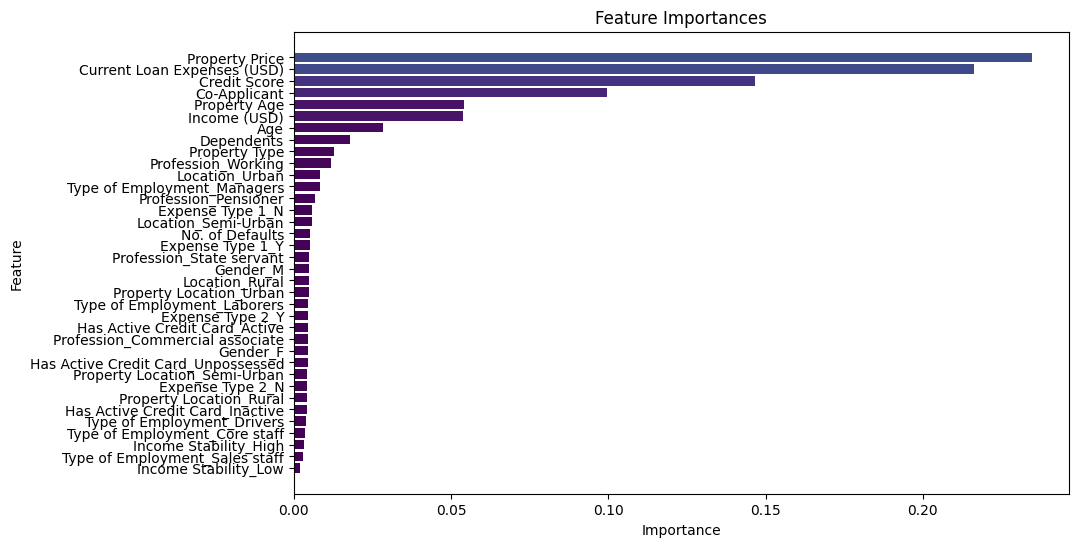

In [34]:
import matplotlib.pyplot as plt

# Extract feature importances from the trained model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=plt.cm.viridis(feature_importance_df['Importance']))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [35]:
df.columns


Index(['Gender_F', 'Gender_M', 'Income Stability_High', 'Income Stability_Low',
       'Profession_Commercial associate', 'Profession_Pensioner',
       'Profession_State servant', 'Profession_Working',
       'Type of Employment_Core staff', 'Type of Employment_Drivers',
       'Type of Employment_Laborers', 'Type of Employment_Managers',
       'Type of Employment_Sales staff', 'Location_Rural',
       'Location_Semi-Urban', 'Location_Urban', 'Expense Type 1_N',
       'Expense Type 1_Y', 'Expense Type 2_N', 'Expense Type 2_Y',
       'Has Active Credit Card_Active', 'Has Active Credit Card_Inactive',
       'Has Active Credit Card_Unpossessed', 'Property Location_Rural',
       'Property Location_Semi-Urban', 'Property Location_Urban', 'Age',
       'Income (USD)', 'Current Loan Expenses (USD)', 'Dependents',
       'Credit Score', 'No. of Defaults', 'Property Age', 'Property Type',
       'Co-Applicant', 'Property Price'],
      dtype='object')

# **Deployment:**

In [37]:
df.columns

Index(['Gender_F', 'Gender_M', 'Income Stability_High', 'Income Stability_Low',
       'Profession_Commercial associate', 'Profession_Pensioner',
       'Profession_State servant', 'Profession_Working',
       'Type of Employment_Core staff', 'Type of Employment_Drivers',
       'Type of Employment_Laborers', 'Type of Employment_Managers',
       'Type of Employment_Sales staff', 'Location_Rural',
       'Location_Semi-Urban', 'Location_Urban', 'Expense Type 1_N',
       'Expense Type 1_Y', 'Expense Type 2_N', 'Expense Type 2_Y',
       'Has Active Credit Card_Active', 'Has Active Credit Card_Inactive',
       'Has Active Credit Card_Unpossessed', 'Property Location_Rural',
       'Property Location_Semi-Urban', 'Property Location_Urban', 'Age',
       'Income (USD)', 'Current Loan Expenses (USD)', 'Dependents',
       'Credit Score', 'No. of Defaults', 'Property Age', 'Property Type',
       'Co-Applicant', 'Property Price'],
      dtype='object')